### <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">EDA-To carry out classification of the soil nutrient of Bezuidenhout Park </p>

**This notebook details the process taken to predict the soil nutient content over bezuidenhout park for the different classes of 
nutrients (aluminium content, pH etc).  Four different Algorithms will be used for this process.These are the Random Forest, Adaboost, GradientBoost and the Xtreme Gradient Boost(XGBoost) Algorithm. Along the preprossing pipeline, Data cleaning, Analysis, transformation and visualistion will take place.**


**The data cleaning will check out for missing values, outliers and even removal of irrelevant columns with justification for it.
The data analysis stage will involve Exploratory Analysis to understand the data and it distribution.
The tranformation stage will involve data transformation such as the Principal Component Analysis for data dimentional reduction and denoising.
The data visualization help represent the data graphically at different stage and point. some of those include feature importance of each models etc.**

 <a id="1"></a>
###  <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [2]:
#import the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [3]:
# Importing data from objective one
#data=pd.read_csv("OBJ1DATA.csv")
#data

##### Our data at this point is a full list of all observations made including all soil nutrient classes .The full data will now be grouped into different extract for different nutrient such the each group represent data collected for the prediction for a specific nutient class only.

In [4]:
# Grouping by 'property_id'
#grouped = data.groupby('property_id')

# Iterate over groups and save each group to a CSV file
#for name, group in grouped:
#    group.to_csv(f'group_{name}.csv', index=False)

In [5]:
df_aluminium=pd.read_csv("group_aluminium_extractable.csv")
df_calcium=pd.read_csv("group_calcium_extractable.csv")
df_carbon=pd.read_csv("group_carbon_total.csv")
df_iron=pd.read_csv("group_iron_extractable.csv")
df_nitrogen=pd.read_csv("group_nitrogen_total.csv")
df_ph=pd.read_csv("group_ph.csv")
df_phosphorus=pd.read_csv("group_phosphorous_extractable.csv")
df_sulphur=pd.read_csv("group_sulphur_extractable.csv")
df_zinc=pd.read_csv("group_zinc_extractable.csv")
df_potassium=pd.read_csv("group_potassium_extractable.csv")
df_magnesium=pd.read_csv("group_magnesium_extractable.csv")
df_exchange_capacity=pd.read_csv("group_cation_exchange_capacity.csv")

In [6]:
# print data for the aluminium class only
df_aluminium

,id,updated_at,created_at,depth,latitude,longitude,value,date_collected,property_id,Costal aerosol,...,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,c84aa92f-7437-4370-946e-6dc2fbd45ba5,2023-10-22 00:30:14.12171+00,2023-10-22 00:30:14.121717+00,0-20,-26.1849,28.0876,48.4,22/10/2023,aluminium_extractable,7097.123996,...,9810.504648,11413.287408,9485.544082,6687.417230,3466.474437,15464.857912,1.718764e+09,275.744138,65.329754,1021.803121
1,ae4c165d-ad13-43bb-991b-9201a52eeb29,2023-10-22 00:30:14.121743+00,2023-10-22 00:30:14.12175+00,20-50,-26.1849,28.0876,53.6,22/10/2023,aluminium_extractable,7071.396220,...,9789.080133,11474.631165,9475.178235,6670.660148,3488.084976,15395.565597,1.717875e+09,279.776860,59.090190,1026.126049
2,5edb7b5d-740f-446b-9195-f08ea6ee8587,2023-10-22 00:30:14.124356+00,2023-10-22 00:30:14.124361+00,0-20,-26.1818,28.0911,53.6,22/10/2023,aluminium_extractable,7062.293189,...,9876.665332,11476.872779,9479.779596,6709.041635,3429.249318,15384.344668,1.716924e+09,279.902756,75.895009,1030.655153
3,bbfc2fd1-8d46-4233-a8e8-3d32b994bab6,2023-10-22 00:30:14.124379+00,2023-10-22 00:30:14.124383+00,20-50,-26.1818,28.0911,48.4,22/10/2023,aluminium_extractable,7120.972247,...,9868.925621,11418.096079,9468.867916,6680.786089,3473.782521,15295.010496,1.718284e+09,275.560748,53.469675,1022.663566
4,fc547e51-ce55-4022-94f5-a42e7b24d021,2023-10-22 00:30:29.074668+00,2023-10-22 00:30:29.074673+00,0-20,-26.1802,28.0875,53.6,22/10/2023,aluminium_extractable,7140.972661,...,9837.386872,11427.227137,9479.132065,6660.645704,3484.852218,15313.842970,1.717970e+09,279.767477,76.766105,1020.156332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,83fbfa82-53f2-4d9d-8e41-65d439b4df15,2023-11-05 00:31:53.966627+00,2023-11-05 00:31:53.966635+00,20-50,-26.1820,28.0895,48.4,05/11/2023,aluminium_extractable,7018.317546,...,9797.486720,11369.772457,9489.933002,6731.353013,3495.055985,15380.172744,1.718604e+09,285.303346,57.310257,1017.261762
1150,8bd3ef33-b003-434a-8c77-766650e91458,2023-11-05 00:32:07.897247+00,2023-11-05 00:32:07.897251+00,0-20,-26.1839,28.0892,53.6,05/11/2023,aluminium_extractable,7026.843914,...,9811.326065,11434.047593,9476.190328,6705.220042,3495.367379,15400.745511,1.717889e+09,283.972338,61.851203,1027.831557
1151,91cc782d-0e0f-4ae9-8aed-23e7e8686c2f,2023-11-05 00:32:07.897267+00,2023-11-05 00:32:07.897271+00,20-50,-26.1839,28.0892,53.6,05/11/2023,aluminium_extractable,7061.870050,...,9834.642668,11490.590320,9468.134161,6709.361478,3471.903833,15448.137198,1.717543e+09,280.858687,57.370952,1017.051618
1152,8f9012b4-7b1f-4cf9-b49c-21397dc4ce80,2023-11-05 00:32:21.636259+00,2023-11-05 00:32:21.636263+00,0-20,-26.1812,28.0897,53.6,05/11/2023,aluminium_extractable,6976.355871,...,9900.134386,11478.833580,9473.801225,6712.835486,3489.238794,15318.271098,1.717814e+09,278.801611,68.918988,1014.040944


In [7]:
df_aluminium.tail()

,id,updated_at,created_at,depth,latitude,longitude,value,date_collected,property_id,Costal aerosol,...,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
1149,83fbfa82-53f2-4d9d-8e41-65d439b4df15,2023-11-05 00:31:53.966627+00,2023-11-05 00:31:53.966635+00,20-50,-26.1820,28.0895,48.4,05/11/2023,aluminium_extractable,7018.317546,...,9797.486720,11369.772457,9489.933002,6731.353013,3495.055985,15380.172744,1.718604e+09,285.303346,57.310257,1017.261762
1150,8bd3ef33-b003-434a-8c77-766650e91458,2023-11-05 00:32:07.897247+00,2023-11-05 00:32:07.897251+00,0-20,-26.1839,28.0892,53.6,05/11/2023,aluminium_extractable,7026.843914,...,9811.326065,11434.047593,9476.190328,6705.220042,3495.367379,15400.745511,1.717889e+09,283.972338,61.851203,1027.831557
1151,91cc782d-0e0f-4ae9-8aed-23e7e8686c2f,2023-11-05 00:32:07.897267+00,2023-11-05 00:32:07.897271+00,20-50,-26.1839,28.0892,53.6,05/11/2023,aluminium_extractable,7061.870050,...,9834.642668,11490.590320,9468.134161,6709.361478,3471.903833,15448.137198,1.717543e+09,280.858687,57.370952,1017.051618
1152,8f9012b4-7b1f-4cf9-b49c-21397dc4ce80,2023-11-05 00:32:21.636259+00,2023-11-05 00:32:21.636263+00,0-20,-26.1812,28.0897,53.6,05/11/2023,aluminium_extractable,6976.355871,...,9900.134386,11478.833580,9473.801225,6712.835486,3489.238794,15318.271098,1.717814e+09,278.801611,68.918988,1014.040944
1153,2041e5ed-8ef3-4ac1-968a-494dac5f89b9,2023-11-05 00:32:21.636279+00,2023-11-05 00:32:21.636283+00,20-50,-26.1812,28.0897,53.6,05/11/2023,aluminium_extractable,7133.076377,...,9890.374792,11343.029414,9486.445752,6691.941660,3473.579726,15408.739462,1.718567e+09,281.639904,60.109982,1023.496178


**NOTE:** `data.info()`: Get a concise summary of the dataset, including data types and missing values.

`data.describe()`: Generate descriptive statistics of numerical columns.

In [8]:
df_aluminium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1154 non-null   object 
 1   updated_at      1154 non-null   object 
 2   created_at      1154 non-null   object 
 3   depth           1154 non-null   object 
 4   latitude        1154 non-null   float64
 5   longitude       1154 non-null   float64
 6   value           1154 non-null   float64
 7   date_collected  1154 non-null   object 
 8   property_id     1154 non-null   object 
 9   Costal aerosol  1154 non-null   float64
 10  Blue_band       1154 non-null   float64
 11  Green_band      1154 non-null   float64
 12  Read Band       1154 non-null   float64
 13  NIVR            1154 non-null   float64
 14  IR1             1154 non-null   float64
 15  IR2             1154 non-null   float64
 16  NIVR_1          1154 non-null   float64
 17  Water Vapour    1154 non-null   f

In [9]:
df_aluminium.describe()

,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1.154000e+03,1154.000000,1154.000000,1154.000000
mean,-26.182557,28.089144,51.600867,7078.166117,6688.219390,6571.167631,6985.161234,9838.936280,11430.495312,9483.796433,6686.565118,3475.031346,15320.133630,1.717781e+09,281.022785,65.867797,1023.826176
std,0.001542,0.001178,3.534459,50.097770,29.368545,29.793983,30.066015,34.681346,100.238479,12.988075,30.541878,14.604045,120.765381,5.853187e+05,2.908466,8.595501,5.761917
min,-26.185100,28.087200,43.700000,6907.960202,6587.035285,6457.672367,6891.363717,9719.800064,11120.096708,9439.308110,6599.347257,3427.961751,14956.148636,1.715862e+09,272.727064,38.954598,1004.024563
25%,-26.183800,28.088100,48.400000,7044.250426,6668.844672,6550.357971,6964.534806,9815.802693,11362.488966,9475.360381,6665.937977,3465.533421,15234.634960,1.717397e+09,279.003869,59.842507,1020.168659
50%,-26.182600,28.089200,53.600000,7077.924924,6688.139674,6571.389276,6985.662339,9839.161922,11430.484732,9483.915380,6685.242255,3474.754430,15318.198656,1.717773e+09,280.977774,66.038500,1023.925468
75%,-26.181300,28.090200,53.600000,7113.512405,6708.356314,6592.241961,7004.380902,9863.451808,11499.074678,9492.717272,6708.665336,3484.446168,15405.831997,1.718179e+09,282.940740,71.355247,1027.621718
max,-26.179900,28.091100,59.300000,7223.314260,6779.453517,6657.645214,7086.646810,9950.447561,11746.228679,9522.560016,6765.520896,3524.948294,15654.185348,1.719593e+09,289.715522,91.923430,1042.619903


#### Handling Missing value in data

In [10]:
#checking out if missing value.
#Handling and checking for missing value
df_aluminium.isnull().sum()

id                0
updated_at        0
created_at        0
depth             0
latitude          0
longitude         0
value             0
date_collected    0
property_id       0
Costal aerosol    0
Blue_band         0
Green_band        0
Read Band         0
NIVR              0
IR1               0
IR2               0
NIVR_1            0
Water Vapour      0
SW12              0
sunset            0
temperature       0
humidity          0
pressure          0
dtype: int64

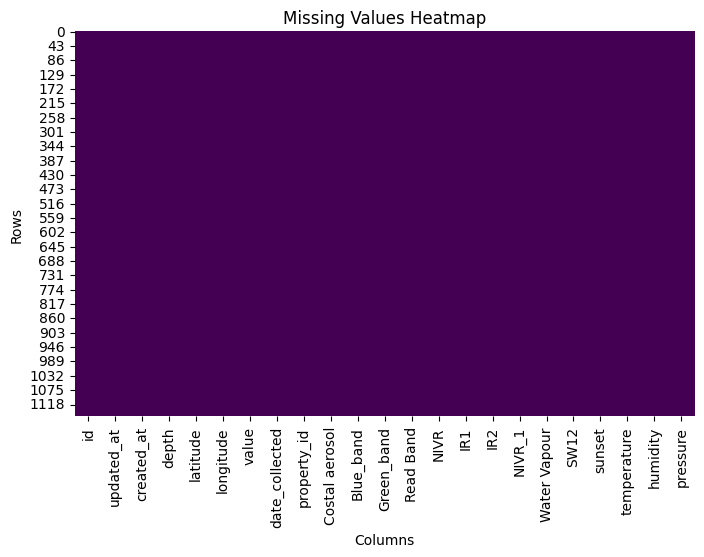

In [11]:
# Visualizing Missing Value
missing_values = df_aluminium.isnull()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### safe no missing value. !!!!

## Note: Removing Unnecessary Columns

In Our dataset, the columns `'id'`, `'updated_at'`, `'created_at'`, and `'property_id'` have been removed as they are not relevant to the task of predicting the target column, "value." 

1. **'id' Column**: This column likely represents a unique identifier for each row. While it may be useful for referencing specific data points, it does not contribute to the predictive power of the model. Therefore, it has been removed to simplify the dataset.

2. **Timestamp Columns ('updated_at' and 'created_at')**: These columns typically indicate when a record was created or last updated. While important for tracking data history, they are not directly related to the target variable. Removing them ensures that the model focuses on meaningful predictors.

3. **'property_id' Column**: If this column represents an identifier for different properties, it may not provide predictive value for the target variable "value" itself. Unless there is a specific analysis or feature engineering task involving property IDs, removing this column simplifies the dataset without losing predictive power.

By removing these unnecessary columns, the dataset becomes more focused, making it easier to interpret and analyze while streamlining the predictive modeling process.


In [12]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_aluminium.drop(columns=columns_to_remove, inplace=True)


In [13]:
df_aluminium

,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,0-20,-26.1849,28.0876,48.4,7097.123996,6737.398312,6558.236723,6978.913726,9810.504648,11413.287408,9485.544082,6687.417230,3466.474437,15464.857912,1.718764e+09,275.744138,65.329754,1021.803121
1,20-50,-26.1849,28.0876,53.6,7071.396220,6651.932877,6562.138938,6955.641982,9789.080133,11474.631165,9475.178235,6670.660148,3488.084976,15395.565597,1.717875e+09,279.776860,59.090190,1026.126049
2,0-20,-26.1818,28.0911,53.6,7062.293189,6673.912260,6593.135948,7039.010374,9876.665332,11476.872779,9479.779596,6709.041635,3429.249318,15384.344668,1.716924e+09,279.902756,75.895009,1030.655153
3,20-50,-26.1818,28.0911,48.4,7120.972247,6671.534555,6610.885986,7002.765425,9868.925621,11418.096079,9468.867916,6680.786089,3473.782521,15295.010496,1.718284e+09,275.560748,53.469675,1022.663566
4,0-20,-26.1802,28.0875,53.6,7140.972661,6700.722051,6565.433684,6998.335321,9837.386872,11427.227137,9479.132065,6660.645704,3484.852218,15313.842970,1.717970e+09,279.767477,76.766105,1020.156332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,20-50,-26.1820,28.0895,48.4,7018.317546,6707.460417,6579.263247,6984.709300,9797.486720,11369.772457,9489.933002,6731.353013,3495.055985,15380.172744,1.718604e+09,285.303346,57.310257,1017.261762
1150,0-20,-26.1839,28.0892,53.6,7026.843914,6737.317993,6535.036029,6991.334011,9811.326065,11434.047593,9476.190328,6705.220042,3495.367379,15400.745511,1.717889e+09,283.972338,61.851203,1027.831557
1151,20-50,-26.1839,28.0892,53.6,7061.870050,6705.990768,6561.186353,6972.795388,9834.642668,11490.590320,9468.134161,6709.361478,3471.903833,15448.137198,1.717543e+09,280.858687,57.370952,1017.051618
1152,0-20,-26.1812,28.0897,53.6,6976.355871,6695.980411,6545.987991,7002.598144,9900.134386,11478.833580,9473.801225,6712.835486,3489.238794,15318.271098,1.717814e+09,278.801611,68.918988,1014.040944


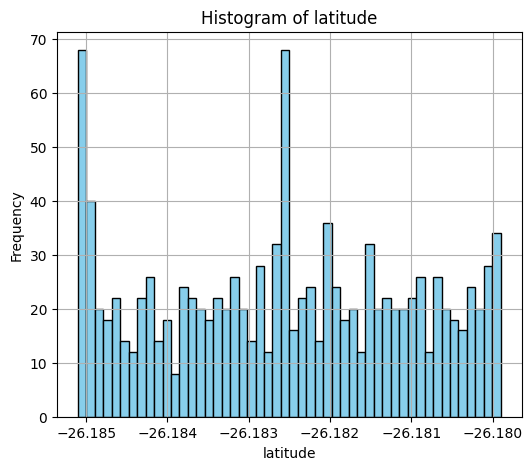

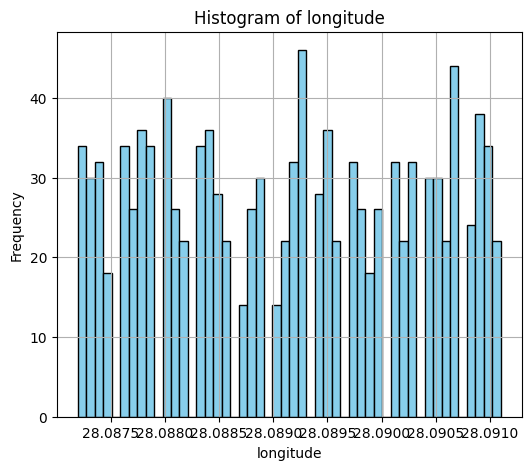

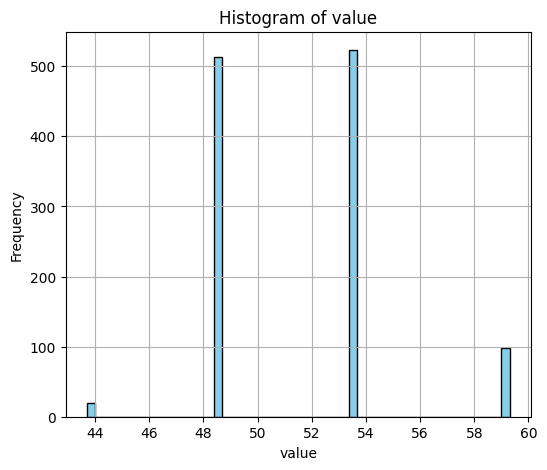

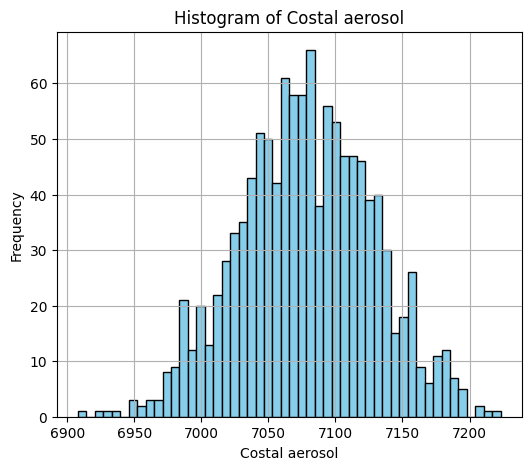

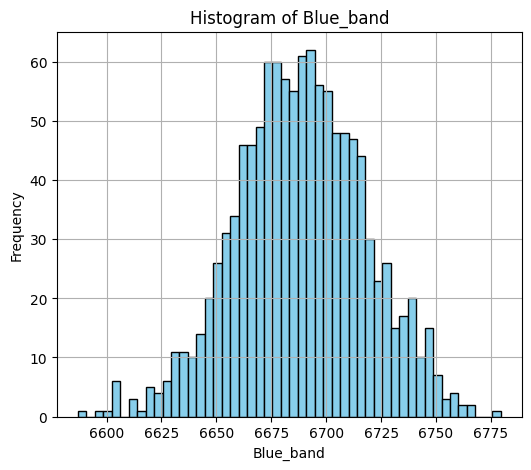

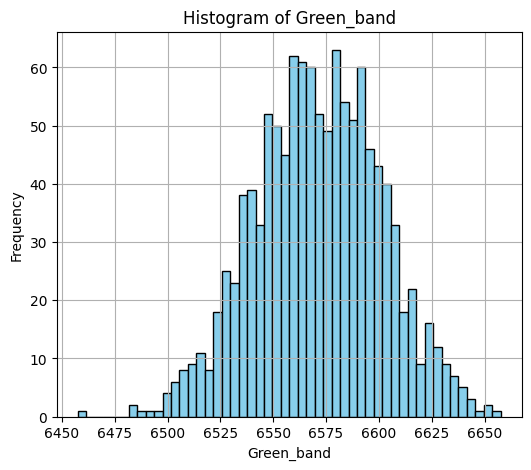

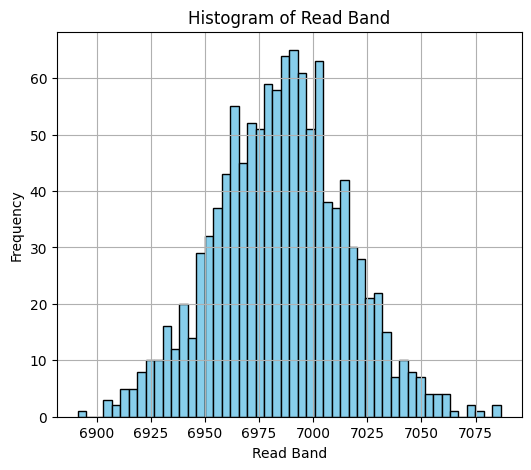

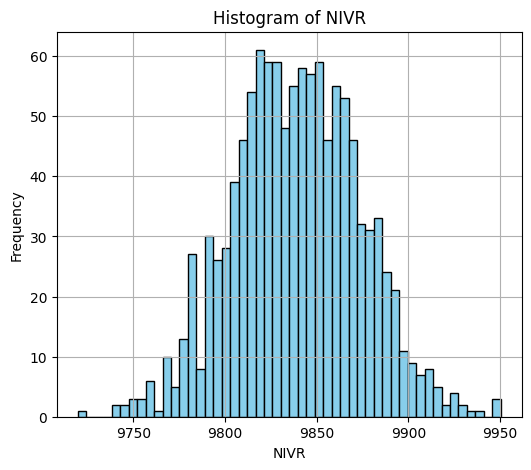

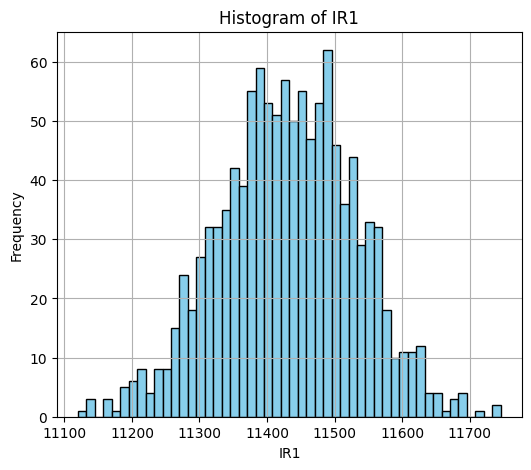

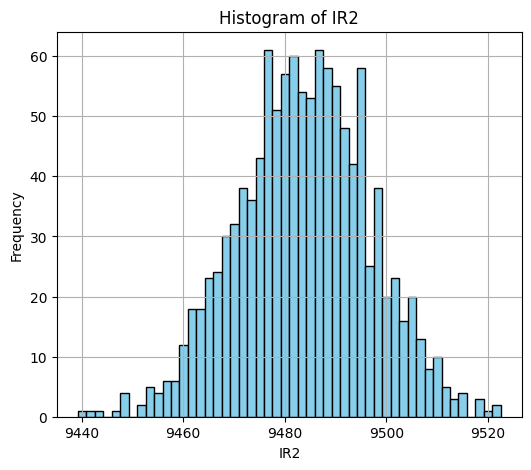

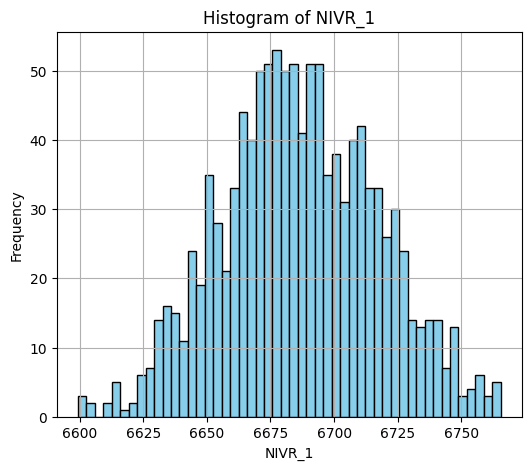

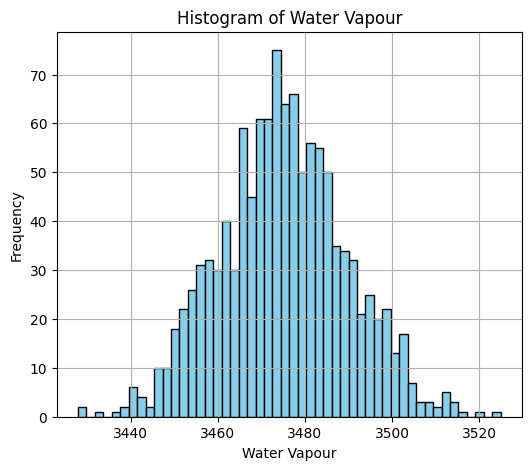

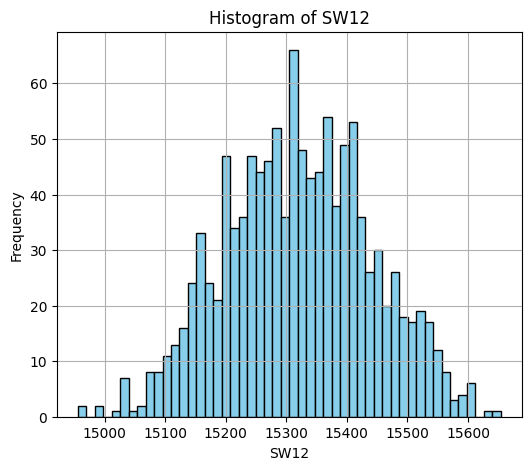

In [14]:
# List of columns to create plots for
columns_to_plot = ['latitude', 'longitude', 'value', 'Costal aerosol', 'Blue_band', 'Green_band', 'Read Band', 
                   'NIVR', 'IR1', 'IR2', 'NIVR_1', 'Water Vapour', 'SW12']

# Loop through each column in the list
for column in columns_to_plot:
    plt.figure(figsize=(6, 5))
    df_aluminium[column].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


## Correlation Heatmap and Interpretation

In the cell bellow, a correlation heatmap is generated for a subset of columns from the DataFrame `df_aluminium`. Specifically, the following columns are considered:

- Latitude
- Longitude
- Value
- Costal Aerosol
- Blue Band
- Green Band
- Red Band
- NIVR
- IR1
- IR2
- NIVR_1
- Water Vapour
- SW12

### Correlation Heatmap

A correlation heatmap is a graphical representation of the correlation matrix, where each cell in the matrix represents the correlation coefficient between two variables. The heatmap is color-coded to indicate the strength and direction of the correlation:

- Positive correlation: When one variable increases, the other variable tends to increase as well (color tends towards red).
- Negative correlation: When one variable increases, the other variable tends to decrease (color tends towards blue).
- No correlation: When the color is closer to white, indicating a weak or no correlation.

### Interpretation

- **Strong Correlation**: Darker shades (closer to 1 or -1) indicate a stronger correlation between the variables. This suggests that changes in one variable are associated with consistent changes in the other variable.
  
- **Weak Correlation**: Lighter shades (closer to 0) indicate a weaker correlation. This suggests that the variables are less likely to vary together.

- **Correlation Direction**: The position of the plot on the heatmap (above or below the diagonal) indicates whether the correlation is positive (above the diagonal) or negative (below the diagonal).


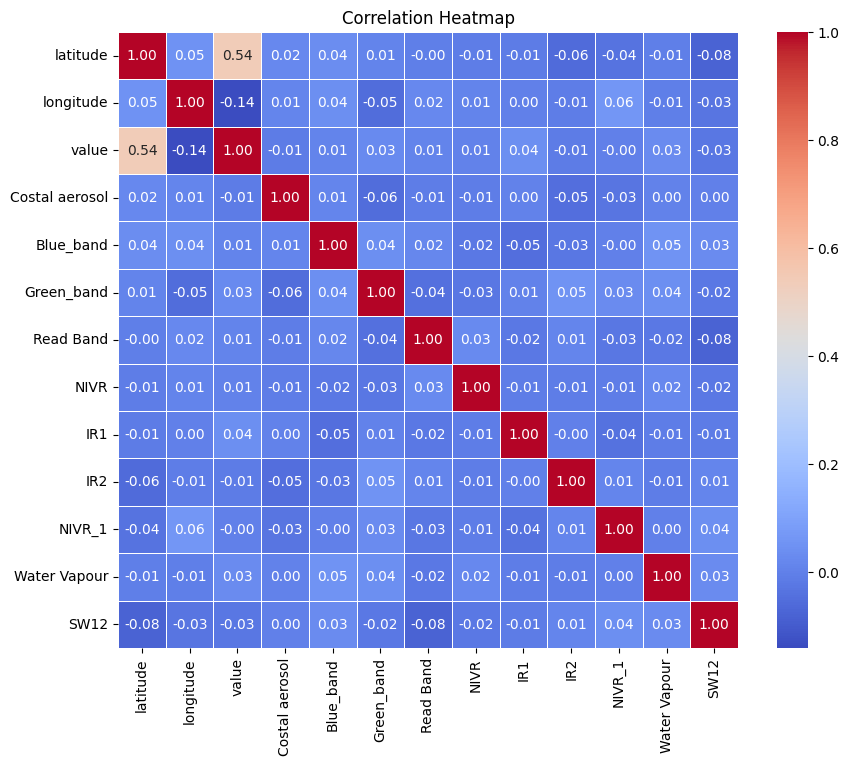

In [15]:
# List of columns to compute correlation for
columns_to_correlate = ['latitude', 'longitude', 'value', 'Costal aerosol', 'Blue_band', 'Green_band', 
                        'Read Band', 'NIVR', 'IR1', 'IR2', 'NIVR_1', 'Water Vapour', 'SW12']

# Compute the correlation matrix
correlation_matrix = df_aluminium[columns_to_correlate].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df_aluminium

,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,0-20,-26.1849,28.0876,48.4,7097.123996,6737.398312,6558.236723,6978.913726,9810.504648,11413.287408,9485.544082,6687.417230,3466.474437,15464.857912,1.718764e+09,275.744138,65.329754,1021.803121
1,20-50,-26.1849,28.0876,53.6,7071.396220,6651.932877,6562.138938,6955.641982,9789.080133,11474.631165,9475.178235,6670.660148,3488.084976,15395.565597,1.717875e+09,279.776860,59.090190,1026.126049
2,0-20,-26.1818,28.0911,53.6,7062.293189,6673.912260,6593.135948,7039.010374,9876.665332,11476.872779,9479.779596,6709.041635,3429.249318,15384.344668,1.716924e+09,279.902756,75.895009,1030.655153
3,20-50,-26.1818,28.0911,48.4,7120.972247,6671.534555,6610.885986,7002.765425,9868.925621,11418.096079,9468.867916,6680.786089,3473.782521,15295.010496,1.718284e+09,275.560748,53.469675,1022.663566
4,0-20,-26.1802,28.0875,53.6,7140.972661,6700.722051,6565.433684,6998.335321,9837.386872,11427.227137,9479.132065,6660.645704,3484.852218,15313.842970,1.717970e+09,279.767477,76.766105,1020.156332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,20-50,-26.1820,28.0895,48.4,7018.317546,6707.460417,6579.263247,6984.709300,9797.486720,11369.772457,9489.933002,6731.353013,3495.055985,15380.172744,1.718604e+09,285.303346,57.310257,1017.261762
1150,0-20,-26.1839,28.0892,53.6,7026.843914,6737.317993,6535.036029,6991.334011,9811.326065,11434.047593,9476.190328,6705.220042,3495.367379,15400.745511,1.717889e+09,283.972338,61.851203,1027.831557
1151,20-50,-26.1839,28.0892,53.6,7061.870050,6705.990768,6561.186353,6972.795388,9834.642668,11490.590320,9468.134161,6709.361478,3471.903833,15448.137198,1.717543e+09,280.858687,57.370952,1017.051618
1152,0-20,-26.1812,28.0897,53.6,6976.355871,6695.980411,6545.987991,7002.598144,9900.134386,11478.833580,9473.801225,6712.835486,3489.238794,15318.271098,1.717814e+09,278.801611,68.918988,1014.040944


In [17]:
df_aluminium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   depth           1154 non-null   object 
 1   latitude        1154 non-null   float64
 2   longitude       1154 non-null   float64
 3   value           1154 non-null   float64
 4   Costal aerosol  1154 non-null   float64
 5   Blue_band       1154 non-null   float64
 6   Green_band      1154 non-null   float64
 7   Read Band       1154 non-null   float64
 8   NIVR            1154 non-null   float64
 9   IR1             1154 non-null   float64
 10  IR2             1154 non-null   float64
 11  NIVR_1          1154 non-null   float64
 12  Water Vapour    1154 non-null   float64
 13  SW12            1154 non-null   float64
 14  sunset          1154 non-null   float64
 15  temperature     1154 non-null   float64
 16  humidity        1154 non-null   float64
 17  pressure        1154 non-null   f

### Handling categorical column 

In [18]:
# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_aluminium['depth'] = df_aluminium['depth'].map(depth_mapping)

# Verify the changes
print(df_aluminium['depth'].head())


0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


In [19]:
df_aluminium

,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,48.4,7097.123996,6737.398312,6558.236723,6978.913726,9810.504648,11413.287408,9485.544082,6687.417230,3466.474437,15464.857912,1.718764e+09,275.744138,65.329754,1021.803121
1,2,-26.1849,28.0876,53.6,7071.396220,6651.932877,6562.138938,6955.641982,9789.080133,11474.631165,9475.178235,6670.660148,3488.084976,15395.565597,1.717875e+09,279.776860,59.090190,1026.126049
2,1,-26.1818,28.0911,53.6,7062.293189,6673.912260,6593.135948,7039.010374,9876.665332,11476.872779,9479.779596,6709.041635,3429.249318,15384.344668,1.716924e+09,279.902756,75.895009,1030.655153
3,2,-26.1818,28.0911,48.4,7120.972247,6671.534555,6610.885986,7002.765425,9868.925621,11418.096079,9468.867916,6680.786089,3473.782521,15295.010496,1.718284e+09,275.560748,53.469675,1022.663566
4,1,-26.1802,28.0875,53.6,7140.972661,6700.722051,6565.433684,6998.335321,9837.386872,11427.227137,9479.132065,6660.645704,3484.852218,15313.842970,1.717970e+09,279.767477,76.766105,1020.156332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,48.4,7018.317546,6707.460417,6579.263247,6984.709300,9797.486720,11369.772457,9489.933002,6731.353013,3495.055985,15380.172744,1.718604e+09,285.303346,57.310257,1017.261762
1150,1,-26.1839,28.0892,53.6,7026.843914,6737.317993,6535.036029,6991.334011,9811.326065,11434.047593,9476.190328,6705.220042,3495.367379,15400.745511,1.717889e+09,283.972338,61.851203,1027.831557
1151,2,-26.1839,28.0892,53.6,7061.870050,6705.990768,6561.186353,6972.795388,9834.642668,11490.590320,9468.134161,6709.361478,3471.903833,15448.137198,1.717543e+09,280.858687,57.370952,1017.051618
1152,1,-26.1812,28.0897,53.6,6976.355871,6695.980411,6545.987991,7002.598144,9900.134386,11478.833580,9473.801225,6712.835486,3489.238794,15318.271098,1.717814e+09,278.801611,68.918988,1014.040944


 <a id="1"></a>
###  <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">DATA MODELING</p>

The modelling of the data will involve using the Random Forest, Xgboost, Adaboost, and Gradient Boosting Algorithms.



### Random Forest Modelling with K-Fold Cross-Validation on `df_aluminium`

The following code demonstrates how to train a Random Forest model on the `df_aluminium` dataset using K-Fold cross-validation. This method is employed to evaluate the model's performance more robustly by splitting the dataset into 10 different folds, ensuring that each subset of data is used both for training and testing.

#### Data Preparation
First, the feature matrix `X` and the target variable `y` are defined by separating the `value` column from the rest of the dataframe:

```python
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

```

### Why Use K-Fold Cross-Validation?
K-Fold cross-validation ensures that the model's performance is evaluated more reliably by training and testing the model on different subsets of the data. This method offers several benefits:

1. **Robust Performance Estimation**: By splitting the data into multiple folds and averaging the performance metrics, K-Fold cross-validation provides a more reliable estimate of the model's true performance compared to a single train-test split.
2. **Efficient Use of Data**: Each data point is used for both training and testing, maximizing the utilization of the available dataset, which is especially beneficial when the dataset is small.
3. **Variance Reduction**: The performance metrics are averaged across all folds, reducing the variance that may occur due to random sampling. This results in a more stable and generalized evaluation.
4. **Model Validation**: By evaluating the model on multiple subsets, K-Fold cross-validation helps to detect overfitting and underfitting, ensuring that the model performs well on unseen data.

### Implications for the Metrics Used
- **RMSE**: Measures the average magnitude of the prediction errors, giving higher weight to large errors.
- **MAE**: Measures the average magnitude of the errors in a straightforward manner, treating all errors equally.
- **R²**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.
- **MAPE**: Expresses prediction accuracy as a percentage, providing interpretability in terms of relative error.
- **CCC**: Assesses the agreement between the predicted and actual values, accounting for both precision and accuracy.



#### 1. RandomForest on Aluminium Prediction

In [19]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_aluminium is the input data
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 2.1976
Average MAE: 1.7698
Average R²: 0.6093
Average MAPE: 3.4607
Average CCC: 0.7437


### GA

### GA RF

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from geneticalgorithm import geneticalgorithm as ga

# Assuming df_aluminium is already defined and loaded with the data
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 13:29:29,847] A new study created in memory with name: no-name-dd271d45-b23f-40ad-8785-982fc553a1cd
[I 2024-07-15 13:29:36,877] Trial 0 finished with value: 2.603181851011711 and parameters: {'n_estimators': 86, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 2.603181851011711.
[I 2024-07-15 13:29:56,642] Trial 1 finished with value: 2.20640635238177 and parameters: {'n_estimators': 78, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 2.20640635238177.
[I 2024-07-15 13:30:17,593] Trial 2 finished with value: 2.2510780738866867 and parameters: {'n_estimators': 84, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 1 with value: 2.20640635238177.
[I 2024-07-15 13:30:29,185] Trial 3 finished with value: 2.6461767607359064 and parameters: {'n_estimators': 175, 'max_depth': 29, 'min_samples_split

[I 2024-07-15 13:53:52,433] Trial 33 finished with value: 2.1917210107583758 and parameters: {'n_estimators': 253, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 27 with value: 2.1806514576943763.
[I 2024-07-15 13:55:04,514] Trial 34 finished with value: 2.1938858165385775 and parameters: {'n_estimators': 285, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 27 with value: 2.1806514576943763.
[I 2024-07-15 13:55:50,841] Trial 35 finished with value: 2.2883176014266193 and parameters: {'n_estimators': 226, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 27 with value: 2.1806514576943763.
[I 2024-07-15 13:56:52,882] Trial 36 finished with value: 2.222789688600435 and parameters: {'n_estimators': 253, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 27 with value: 2.1806514576943763.

Best hyperparameters: {'n_estimators': 256, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}
Average RMSE: 2.1730
Average MAE: 1.7627
Average R²: 0.6181
Average MAPE: 3.4471
Average CCC: 0.7484


#### 2. XGBOOST on Aluminium Prediction

In [23]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 2.1855
Average MAE: 1.7182
Average R²: 0.6132
Average MAPE: 3.3544
Average CCC: 0.7647


In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from geneticalgorithm import geneticalgorithm as ga

X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 14:14:13,068] A new study created in memory with name: no-name-ef455beb-82d5-438a-af08-df5e3d0cf7dc
[I 2024-07-15 14:14:53,240] Trial 0 finished with value: 2.3036268960078194 and parameters: {'n_estimators': 153, 'max_depth': 24, 'learning_rate': 0.04849934243761332, 'subsample': 0.6146981656336272, 'colsample_bytree': 0.6749206605285685, 'min_child_weight': 1}. Best is trial 0 with value: 2.3036268960078194.
[I 2024-07-15 14:15:09,484] Trial 1 finished with value: 2.3362676207403865 and parameters: {'n_estimators': 181, 'max_depth': 28, 'learning_rate': 0.23305383133759167, 'subsample': 0.6533493778032069, 'colsample_bytree': 0.571378443567466, 'min_child_weight': 5}. Best is trial 0 with value: 2.3036268960078194.
[I 2024-07-15 14:15:16,252] Trial 2 finished with value: 2.534871381396671 and parameters: {'n_estimators': 110, 'max_depth': 16, 'learning_rate': 0.015292171879364443, 'subsample': 0.7185068213329311, 'colsample_bytree': 0.5436356579096666, 'min_child_weight

[I 2024-07-15 14:22:08,344] Trial 26 finished with value: 2.0341522220289043 and parameters: {'n_estimators': 126, 'max_depth': 12, 'learning_rate': 0.29652594090934836, 'subsample': 0.9143749280383976, 'colsample_bytree': 0.996336143311792, 'min_child_weight': 2}. Best is trial 25 with value: 1.991985302028708.
[I 2024-07-15 14:22:14,999] Trial 27 finished with value: 2.2676061959017155 and parameters: {'n_estimators': 133, 'max_depth': 6, 'learning_rate': 0.27563233869628656, 'subsample': 0.8250262085818401, 'colsample_bytree': 0.9972936884997281, 'min_child_weight': 2}. Best is trial 25 with value: 1.991985302028708.
[I 2024-07-15 14:22:29,638] Trial 28 finished with value: 2.0566758466265513 and parameters: {'n_estimators': 121, 'max_depth': 13, 'learning_rate': 0.2965306971386424, 'subsample': 0.921884578165372, 'colsample_bytree': 0.9507698085323742, 'min_child_weight': 1}. Best is trial 25 with value: 1.991985302028708.
[I 2024-07-15 14:22:50,884] Trial 29 finished with value: 2

Best hyperparameters: {'n_estimators': 73, 'max_depth': 14, 'learning_rate': 0.058561685711226275, 'subsample': 0.9235455545650726, 'colsample_bytree': 0.9674175753329394, 'min_child_weight': 2}
Average RMSE: 1.9692
Average MAE: 1.5265
Average R²: 0.6868
Average MAPE: 2.9808
Average CCC: 0.8017


#### 3. AdaBoost on Aluminium Prediction

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 2.4887
Average MAE: 2.3149
Average R²: 0.5002
Average MAPE: 4.5112
Average CCC: 0.6378


In [21]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


C:\Users\AIDOL\anaconda3\envs\notebook\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-07-17 20:06:46,993] A new study created in memory with name: no-name-042cc22e-d3ef-42d4-a058-65d18ece3a71
<ipython-input-21-3186d13c7a01>:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
[I 2024-07-17 20:07:28,510] Trial 0 finished with value: 2.5123551922602414 and parameters: {'n_estimators': 215, 'learning_rate': 0.08822501651940458}. Best is trial 0 with value: 2.5123551922602414.
<ipython-input-21-3186d13c7a01>:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

KeyboardInterrupt: 

#### 4. GradientBoosting on Aluminium Prediction

In [27]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 2.3593
Average MAE: 1.9542
Average R²: 0.5498
Average MAPE: 3.8108
Average CCC: 0.7000


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 14:29:38,710] A new study created in memory with name: no-name-1e73f240-476b-41fc-8437-8f397b037b34
[I 2024-07-15 14:30:12,176] Trial 0 finished with value: 2.328650551893325 and parameters: {'n_estimators': 61, 'max_depth': 16, 'learning_rate': 0.2590959220578754, 'subsample': 0.6884256286304903, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 2.328650551893325.
[I 2024-07-15 14:30:45,548] Trial 1 finished with value: 2.643356783158298 and parameters: {'n_estimators': 281, 'max_depth': 15, 'learning_rate': 0.18633216976218486, 'subsample': 0.6943554746430836, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 2.328650551893325.
[I 2024-07-15 14:33:15,249] Trial 2 finished with value: 2.13458541899291 and parameters: {'n_estimators': 215, 'max_depth': 22, 'learning_rate': 0.07669279252835551, 'subsample': 0.6755312282987858, 'min_samples_split': 2, 'min_samples_leaf': 2, 'ma

[I 2024-07-15 15:10:11,939] Trial 26 finished with value: 2.011953863272628 and parameters: {'n_estimators': 269, 'max_depth': 8, 'learning_rate': 0.09667086597603208, 'subsample': 0.8993542411512963, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 22 with value: 1.9388104210874535.
[I 2024-07-15 15:14:51,078] Trial 27 finished with value: 2.0161478326836546 and parameters: {'n_estimators': 227, 'max_depth': 25, 'learning_rate': 0.1391449664081339, 'subsample': 0.954001956203645, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 22 with value: 1.9388104210874535.
[I 2024-07-15 15:15:32,984] Trial 28 finished with value: 2.448397749680294 and parameters: {'n_estimators': 184, 'max_depth': 28, 'learning_rate': 0.05653670169260422, 'subsample': 0.8362666317980506, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 22 with value: 1.9388104210874535.
[I 2024-07-15 15:16:01,519] Trial 29 

Best hyperparameters: {'n_estimators': 257, 'max_depth': 28, 'learning_rate': 0.02686834978580005, 'subsample': 0.9717817364755881, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': None}
Average RMSE: 1.9313
Average MAE: 1.4414
Average R²: 0.6975
Average MAPE: 2.8219
Average CCC: 0.8173



### Feature Importance and Its Calculation in the used Models

Feature importance is a crucial aspect of understanding how machine learning models make predictions. It refers to the contribution of each feature in the dataset towards the model's predictive power. By analyzing feature importance, we can identify which variables significantly influence the target variable and make informed decisions about feature selection, engineering, and further data analysis.

#### Internal Calculation of Feature Importance

Different machine learning models calculate feature importance in various ways, but the core idea remains the same: measuring the impact of each feature on the model's performance.

1. **Random Forest**:
   - In Random Forest, feature importance is typically computed by averaging the decrease in impurity (such as Gini impurity or entropy) brought by a feature across all the trees in the forest. When a feature is used to split a node, the impurity is reduced. This reduction is aggregated for each feature over all trees to measure its importance.

2. **XGBoost**:
   - XGBoost calculates feature importance based on three metrics: Gain, Coverage, and Frequency. Gain measures the improvement in accuracy brought by a feature to the branches it is on. Coverage measures the relative quantity of observations concerned by a feature. Frequency simply counts how often a feature is used in all the trees.

3. **AdaBoost**:
   - In AdaBoost, feature importance is derived from the weights of the weak learners. The algorithm focuses on misclassified observations by increasing their weights. The importance of a feature is determined by its influence on the errors and how much it helps in reducing the overall classification error across the iterations.

4. **Gradient Boosting**:
   - Similar to Random Forest, Gradient Boosting computes feature importance by averaging the reduction in impurity brought by each feature over all the boosting stages. Each feature's contribution to improving model performance is tracked and aggregated.


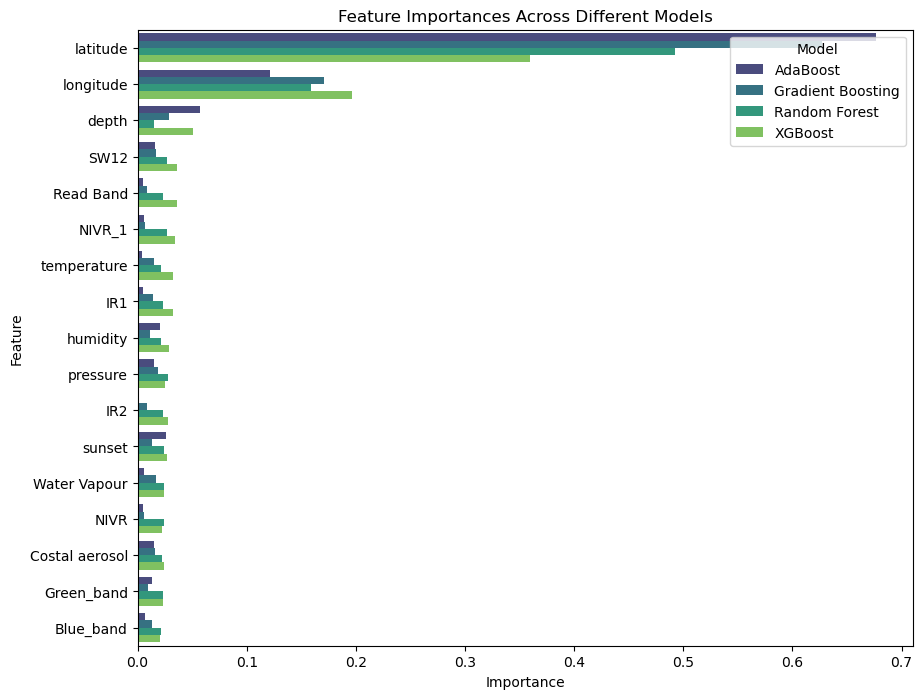

In [29]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

# Dictionary to store feature importances
importances = {}

# Train each model and get feature importances
for model_name, model in models.items():
    model.fit(X, y)
    importances[model_name] = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame(importances, index=X.columns)
importance_df = importance_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Importance')
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='index', hue='Model', data=importance_df, palette='viridis')
plt.title('Feature Importances Across Different Models')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model', loc='upper right')
plt.show()


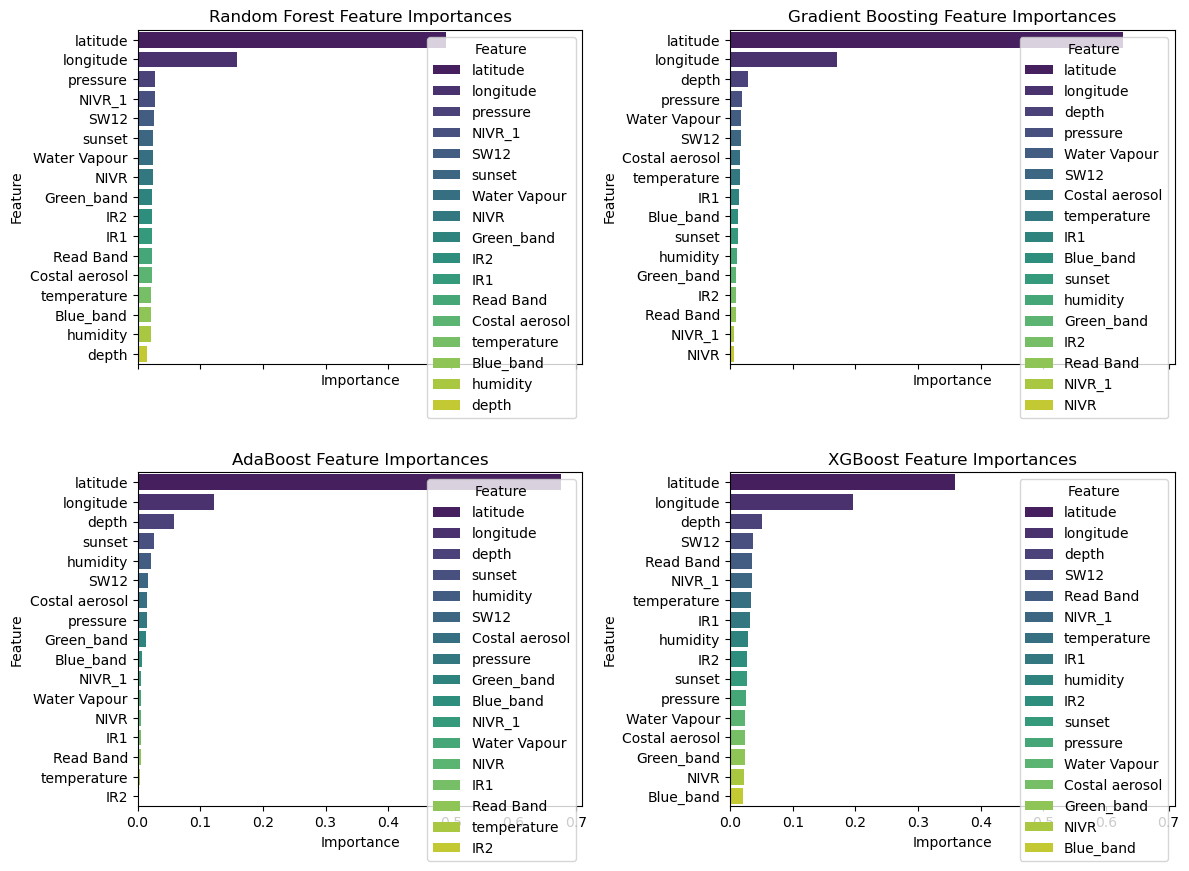

In [30]:
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

# Dictionary to store feature importances
importances = {}

# Train each model and get feature importances
for model_name, model in models.items():
    model.fit(X, y)
    importances[model_name] = model.feature_importances_

# Create a DataFrame for visualization
importance_dfs = {}
for model_name, importance in importances.items():
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    importance_dfs[model_name] = importance_df

# Plot feature importances in subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)
axes = axes.flatten()

for ax, (model_name, importance_df) in zip(axes, importance_dfs.items()):
    sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax, hue='Feature', dodge=False, palette='viridis')
    ax.set_title(f'{model_name} Feature Importances')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')

plt.tight_layout()
plt.show()


### PCA 3D Plot: Visualization and Its Importance

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique used in machine learning and data analysis. It transforms the original features into a new set of uncorrelated variables called principal components, which capture the maximum variance in the data. Visualizing these principal components helps in understanding the structure and relationships within the dataset.

#### Purpose and Benefits of PCA

1. **Dimensionality Reduction**: PCA reduces the number of features while preserving the most important information, making the data easier to analyze and visualize.
2. **Noise Reduction**: By focusing on the principal components that capture the most variance, PCA can help filter out noise and redundant information in the dataset.
3. **Visualization**: PCA enables the visualization of high-dimensional data in 2D or 3D plots, providing insights into the data's underlying structure, patterns, and clusters.

#### PCA 3D Plot

A PCA 3D plot represents the first three principal components of the transformed data in a three-dimensional space. Each point in the plot corresponds to a data instance, and its position is determined by its values on the three principal components. This visualization offers several advantages:

1. **Clustering and Separation**: The PCA 3D plot allows for the identification of natural clusters and groupings within the data. Points that are close to each other indicate similar observations, while distant points suggest distinct groups or outliers.
2. **Exploratory Data Analysis (EDA)**: The plot provides a visual summary of the dataset, helping to identify trends, correlations, and potential anomalies. It aids in hypothesis generation and guides further data exploration.
3. **Feature Contribution**: By examining the loadings of the original features on the principal components, one can infer which features contribute most to the variance captured by the principal components. This helps in feature selection and understanding the underlying data structure.

#### Interpretation of PCA Results

The principal components are linear combinations of the original features, ordered by the amount of variance they explain. The first principal component captures the most variance, followed by the second, and so on. In the 3D plot, the axes represent these principal components, with their directions indicating the maximum spread of the data. The spread and orientation of the data points provide insights into the data's intrinsic dimensions and the relationships between features.

Using a PCA 3D plot in the `df_aluminium` dataset enables a deeper understanding of the dataset's complexity, facilitates effective data visualization, and aids in making informed decisions during the modeling process. This step is essential for uncovering the hidden structure of the data and enhancing the interpretability of machine learning models.


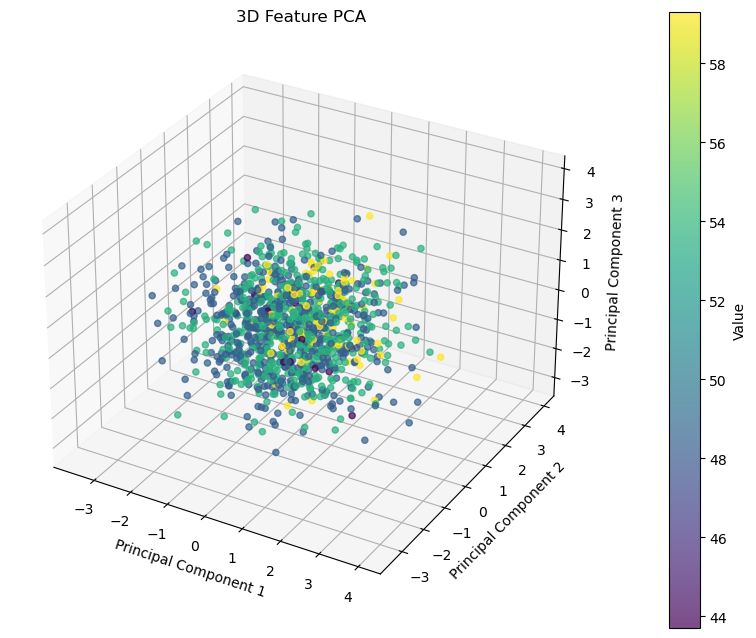

In [31]:
# Separate features and target
X = df_aluminium.drop(columns=['value'])
y = df_aluminium['value']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Combine the principal components with the target variable
pca_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)

# Plot the PCA result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['value'], cmap='viridis', alpha=0.7)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Value')

# Set labels
ax.set_title('3D Feature PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


### RESULT SUMMARY

In [32]:
result=pd.read_csv("df_result.csv")
result
result.set_index('Unnamed: 0', inplace=True)

### **COMPARATIVE PLOT**

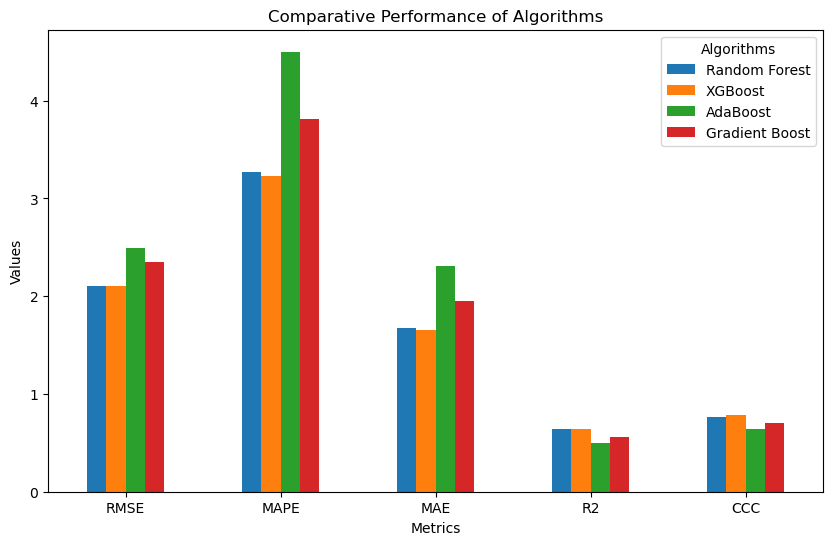

In [33]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance.png', dpi=300)

# Display the plot
plt.show()


### SULPHUR DATA

In [34]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_sulphur.drop(columns=columns_to_remove, inplace=True)


In [35]:
# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_sulphur['depth'] = df_sulphur['depth'].map(depth_mapping)

# Verify the changes
print(df_sulphur['depth'].head())


0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


In [36]:
df_sulphur

,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,4.0,7050.486622,6757.629928,6538.741342,6964.690616,9800.722194,11504.064903,9503.731901,6679.990600,3508.031358,15277.333474,1.718476e+09,282.937518,52.757154,1031.604882
1,2,-26.1849,28.0876,2.3,7068.435244,6685.172011,6563.269235,6957.260244,9832.270527,11487.654559,9480.191381,6650.295005,3472.524764,15144.148950,1.717998e+09,276.236387,59.144055,1022.322577
2,1,-26.1818,28.0911,3.5,7057.171370,6680.902323,6549.177759,6958.377212,9877.206033,11481.069537,9467.937460,6688.039061,3463.557060,15386.476646,1.717523e+09,283.656070,69.849989,1022.654063
3,2,-26.1818,28.0911,2.3,7001.626952,6730.213084,6549.776615,6966.116986,9868.417701,11324.999103,9459.345023,6748.840753,3504.405567,15416.863026,1.717365e+09,280.479242,63.161243,1012.582358
4,1,-26.1802,28.0875,4.5,7096.948839,6637.463967,6581.602751,6994.189805,9865.975738,11477.160203,9474.760154,6751.299649,3486.974228,15445.315694,1.717036e+09,278.201600,73.730818,1014.152438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,2.0,7115.879443,6705.742252,6569.796904,7005.627857,9810.408857,11468.442003,9476.858361,6686.292853,3477.658574,15429.864409,1.717463e+09,282.012229,62.022013,1019.400591
1150,1,-26.1839,28.0892,3.5,7102.416558,6685.231894,6572.903126,6939.792791,9832.065820,11179.034901,9477.135756,6682.762262,3497.976890,15440.333807,1.717963e+09,289.710307,73.164885,1031.741653
1151,2,-26.1839,28.0892,2.3,6962.579423,6673.963497,6592.970500,6976.684040,9874.342606,11523.826094,9497.598099,6692.435328,3506.028628,15317.399282,1.717312e+09,283.411116,71.083932,1020.575575
1152,1,-26.1812,28.0897,4.0,7067.025946,6630.961378,6564.083916,6962.849608,9807.438267,11471.013992,9484.210581,6694.527054,3469.395313,15135.481365,1.717647e+09,278.739090,66.036263,1029.662759


### Random Forest on sulpur Prediction

In [37]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_aluminium is the input data
X = df_sulphur.drop(columns=['value'])
y = df_sulphur['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1940
Average MAE: 0.1479
Average R²: 0.9302
Average MAPE: 5.3475
Average CCC: 0.9639


## GA

In [38]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 16:39:49,039] A new study created in memory with name: no-name-5acccc74-485b-4560-9faa-f0076f36539c
[I 2024-07-15 16:40:15,739] Trial 0 finished with value: 0.25153166007734373 and parameters: {'n_estimators': 228, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.25153166007734373.
[I 2024-07-15 16:40:38,943] Trial 1 finished with value: 0.24819312429176743 and parameters: {'n_estimators': 205, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.24819312429176743.
[I 2024-07-15 16:40:53,471] Trial 2 finished with value: 0.2625006788685982 and parameters: {'n_estimators': 142, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 1 with value: 0.24819312429176743.
[I 2024-07-15 16:41:06,790] Trial 3 finished with value: 0.26346969227056605 and parameters: {'n_estimators': 128, 'max_depth': 

[I 2024-07-15 17:20:47,840] Trial 33 finished with value: 0.19100086058261115 and parameters: {'n_estimators': 215, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 32 with value: 0.19098895048886944.
[I 2024-07-15 17:22:15,409] Trial 34 finished with value: 0.19150954302049672 and parameters: {'n_estimators': 213, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 32 with value: 0.19098895048886944.
[I 2024-07-15 17:23:54,224] Trial 35 finished with value: 0.19127120250428847 and parameters: {'n_estimators': 221, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 32 with value: 0.19098895048886944.
[I 2024-07-15 17:24:24,203] Trial 36 finished with value: 0.22622621721747693 and parameters: {'n_estimators': 192, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 32 with value: 0.19098

Best hyperparameters: {'n_estimators': 212, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}
Average RMSE: 0.1910
Average MAE: 0.1462
Average R²: 0.9323
Average MAPE: 5.2879
Average CCC: 0.9649


### XGBoost on sulpur Prediction

In [39]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_sulphur.drop(columns=['value'])
y = df_sulphur['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1928
Average MAE: 0.1476
Average R²: 0.9311
Average MAPE: 5.3588
Average CCC: 0.9642


In [ ]:
## GA XGBOOST

In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### AdaBoost on sulpur Prediction

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_sulphur.drop(columns=['value'])
y = df_sulphur['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.2110
Average MAE: 0.1573
Average R²: 0.9177
Average MAPE: 5.6907
Average CCC: 0.9573


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### Gradient Boosting on sulpur Prediction

In [41]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_sulphur.drop(columns=['value'])
y = df_sulphur['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1915
Average MAE: 0.1456
Average R²: 0.9321
Average MAPE: 5.3038
Average CCC: 0.9644


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### RESULT SUMMARY ON SULPHUR

In [42]:
result=pd.read_csv("result_sulphur.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.1897,0.1870,0.2101,0.1883
MAPE,5.2041,5.0926,5.6372,5.2067
MAE,0.1438,0.1401,0.1562,0.1431
R2,0.9331,0.9350,0.9185,0.9343
CCC,0.9653,0.9663,0.9578,0.9656


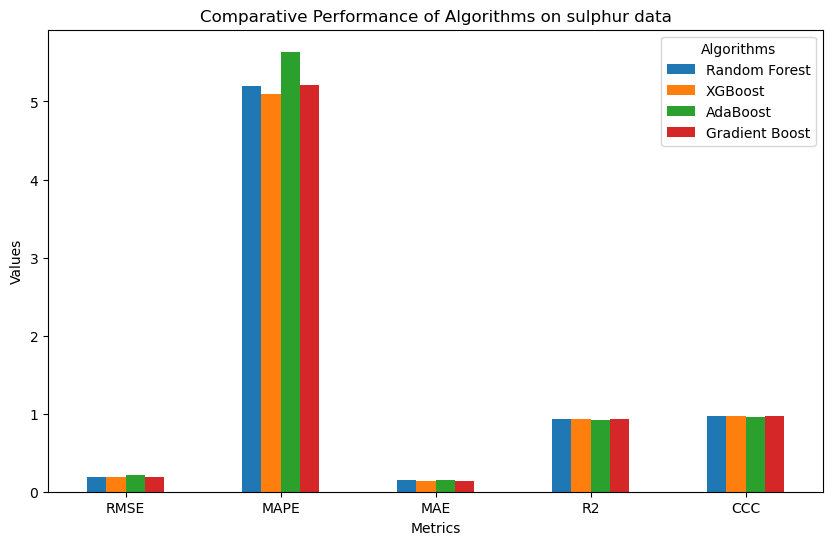

In [43]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on sulphur data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance.png', dpi=300)

# Display the plot
plt.show()


### ZINC DATASET

In [44]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_zinc.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_zinc['depth'] = df_zinc['depth'].map(depth_mapping)

# Verify the changes
print(df_sulphur['depth'].head())


df_zinc

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,1.5,7141.233394,6686.882452,6606.490199,7019.089037,9830.070417,11256.626834,9490.876406,6713.846364,3475.393267,15192.897585,1.716917e+09,277.082844,60.138861,1016.319774
1,2,-26.1849,28.0876,1.0,7096.872368,6683.723161,6571.239364,6957.713609,9801.681019,11417.404297,9507.435218,6645.446891,3461.486999,15091.319418,1.718229e+09,284.582410,72.469641,1030.812563
2,1,-26.1818,28.0911,1.5,7107.644421,6695.019063,6567.973938,6971.035280,9832.664307,11235.706669,9496.802890,6679.773115,3489.510648,15430.498823,1.717383e+09,284.587593,64.565550,1020.599337
3,2,-26.1818,28.0911,1.2,7122.825695,6734.578520,6569.181521,7016.169601,9829.749110,11372.974826,9480.625239,6707.499095,3468.945449,15341.430074,1.717208e+09,282.678934,49.202521,1018.637564
4,1,-26.1802,28.0875,1.5,7157.657291,6661.051818,6552.079515,6978.747709,9794.910382,11181.106262,9479.552612,6701.220869,3491.480257,15246.919121,1.717460e+09,279.802358,80.022252,1027.167121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,1.0,7068.681295,6728.045988,6585.670411,7012.679446,9846.871910,11664.630861,9471.066541,6659.161578,3456.513299,15229.255769,1.716634e+09,277.464830,60.229124,1032.725524
1150,1,-26.1839,28.0892,1.5,7116.384465,6751.919863,6570.465853,6957.139415,9806.929885,11327.490611,9488.422593,6676.177780,3475.397538,15448.537594,1.716918e+09,282.060916,62.022501,1025.882887
1151,2,-26.1839,28.0892,1.2,7155.896200,6681.839508,6579.215782,6974.472721,9805.134275,11451.068391,9513.699327,6679.796229,3477.657409,15354.242749,1.716762e+09,283.759292,47.971712,1025.270604
1152,1,-26.1812,28.0897,1.5,7059.969538,6724.334621,6598.345109,6985.827190,9816.008495,11386.146362,9488.225097,6656.432321,3470.746092,15210.938143,1.718183e+09,283.844906,58.002139,1034.937989


### Random Forest on ZINC Prediction

In [45]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_aluminium is the input data
X = df_zinc.drop(columns=['value'])
y = df_zinc['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1187
Average MAE: 0.0977
Average R²: 0.6861
Average MAPE: 8.1712
Average CCC: 0.8108


In [46]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 17:43:45,656] A new study created in memory with name: no-name-5f08915b-4eac-46bf-963e-306542a91b62
[I 2024-07-15 17:44:07,792] Trial 0 finished with value: 0.13921932105057447 and parameters: {'n_estimators': 224, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.13921932105057447.
[I 2024-07-15 17:44:48,308] Trial 1 finished with value: 0.13402779543268342 and parameters: {'n_estimators': 299, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.13402779543268342.
[I 2024-07-15 17:44:58,202] Trial 2 finished with value: 0.13592113122478058 and parameters: {'n_estimators': 82, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 0.13402779543268342.
[I 2024-07-15 17:45:10,992] Trial 3 finished with value: 0.13403461842318162 and parameters: {'n_estimators': 87, 'max_depth': 23

[I 2024-07-15 21:28:30,226] Trial 32 finished with value: 0.11762510244836603 and parameters: {'n_estimators': 264, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 23 with value: 0.11758466726005098.
[I 2024-07-15 21:30:03,025] Trial 33 finished with value: 0.11756260949702405 and parameters: {'n_estimators': 290, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 33 with value: 0.11756260949702405.
[I 2024-07-15 21:31:38,123] Trial 34 finished with value: 0.11754278572283208 and parameters: {'n_estimators': 291, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 34 with value: 0.11754278572283208.
[I 2024-07-15 21:33:00,612] Trial 35 finished with value: 0.11821055882091405 and parameters: {'n_estimators': 287, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 34 with value: 0.1175427

Best hyperparameters: {'n_estimators': 291, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}
Average RMSE: 0.1175
Average MAE: 0.0966
Average R²: 0.6925
Average MAPE: 8.0732
Average CCC: 0.8147


### XGBoost on ZINC Prediction

In [47]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1223
Average MAE: 0.0961
Average R²: 0.6661
Average MAPE: 8.0383
Average CCC: 0.8022


In [ ]:
##GA xgb

In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### AdaBoost on ZINC Prediction

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_zinc.drop(columns=['value'])
y = df_zinc['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.1371
Average MAE: 0.1202
Average R²: 0.5813
Average MAPE: 10.0010
Average CCC: 0.7422


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### Gradient Boost on ZINC Prediction

In [49]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_zinc.drop(columns=['value'])
y = df_zinc['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.1244
Average MAE: 0.1056
Average R²: 0.6553
Average MAPE: 8.8824
Average CCC: 0.7842


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### RESULT SUMMARY FOR ZINC

In [50]:
result=pd.read_csv("result_zinc.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.1169,0.1198,0.1340,0.1238
MAPE,7.9522,7.9975,9.7373,8.8095
MAE,0.0948,0.0950,0.1177,0.1047
R2,0.6961,0.6800,0.6000,0.6588
CCC,0.8175,0.8142,0.7554,0.7872


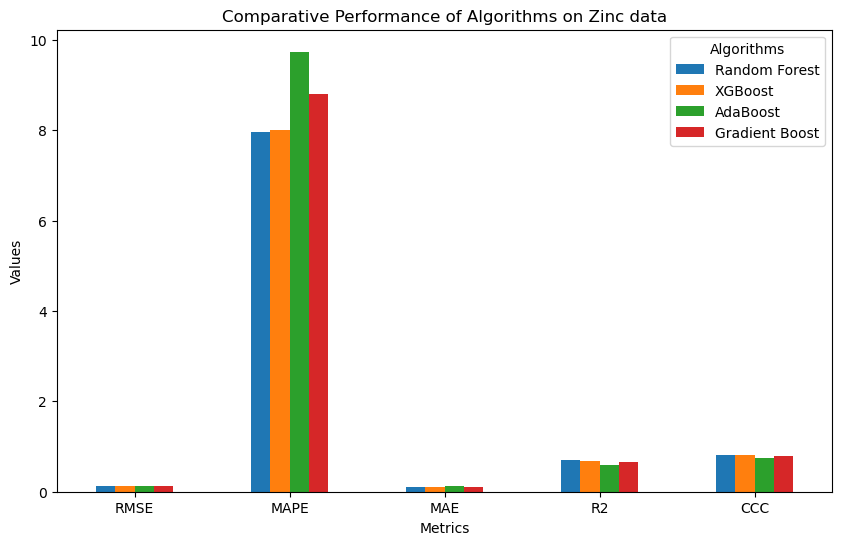

In [51]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on Zinc data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance.png', dpi=300)

# Display the plot
plt.show()


In [52]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_ph.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_ph['depth'] = df_ph['depth'].map(depth_mapping)

# Verify the changes
print(df_ph['depth'].head())


df_ph

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,6.1,7114.032046,6666.908019,6536.045616,6931.295244,9770.610976,11303.779764,9494.511527,6694.759240,3504.153459,15365.818032,1.717790e+09,285.126927,57.838293,1022.288159
1,2,-26.1849,28.0876,6.0,7110.092305,6659.721408,6587.689581,6978.800302,9824.448251,11504.489642,9472.336665,6677.030055,3506.011053,15125.438296,1.717942e+09,275.089907,82.997469,1024.436620
2,1,-26.1818,28.0911,6.0,7085.383868,6669.862541,6546.341237,6940.077909,9809.279173,11534.603722,9477.070229,6664.025773,3479.511126,15290.926143,1.718568e+09,275.549894,62.159163,1031.795600
3,2,-26.1818,28.0911,5.9,7039.806449,6656.991168,6630.409143,6963.974423,9802.504454,11411.186871,9476.313943,6656.689281,3459.357372,15213.675942,1.717702e+09,280.642645,65.827787,1025.005009
4,1,-26.1802,28.0875,5.8,7151.287116,6697.027932,6511.651046,7008.143942,9892.887881,11488.910389,9489.851611,6680.654477,3478.435908,15225.360217,1.717800e+09,283.198435,61.509654,1021.602864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2,-26.1851,28.0895,5.9,7090.590269,6669.753428,6580.566681,6968.191218,9854.986467,11178.936187,9479.325804,6712.189175,3445.567228,15397.352093,1.717858e+09,282.806129,76.951298,1025.403967
1148,1,-26.1820,28.0895,5.9,7084.091246,6693.435125,6550.271580,7011.446867,9828.240244,11204.511517,9494.061804,6708.880792,3450.176217,15353.610288,1.717949e+09,282.497900,58.205183,1023.912125
1149,2,-26.1820,28.0895,5.9,7136.643521,6699.789249,6553.430649,6963.238014,9908.440925,11241.865321,9489.900965,6651.779521,3474.219803,15394.557652,1.718833e+09,282.855496,73.428663,1023.930891
1150,1,-26.1839,28.0892,5.9,7144.181951,6701.639165,6550.337566,7000.967121,9839.559199,11414.931161,9449.535830,6735.853380,3449.325126,15129.894181,1.717156e+09,282.723959,58.244200,1021.015362


### Random Forest on PH Prediction

In [53]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_aluminium is the input data
X = df_ph.drop(columns=['value'])
y = df_ph['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0652
Average MAE: 0.0505
Average R²: 0.5207
Average MAPE: 0.8553
Average CCC: 0.6805


In [54]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 21:50:43,130] A new study created in memory with name: no-name-3a76ad57-41ee-4ba7-9363-146c86aa8aa9
[I 2024-07-15 21:52:05,760] Trial 0 finished with value: 0.06529237026980453 and parameters: {'n_estimators': 288, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 0 with value: 0.06529237026980453.
[I 2024-07-15 21:52:14,492] Trial 1 finished with value: 0.07262302143534569 and parameters: {'n_estimators': 102, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.06529237026980453.
[I 2024-07-15 21:53:07,188] Trial 2 finished with value: 0.06640336814585066 and parameters: {'n_estimators': 233, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.06529237026980453.
[I 2024-07-15 21:53:29,420] Trial 3 finished with value: 0.0714395443655188 and parameters: {'n_estimators': 232, 'max_depth': 26,

[I 2024-07-15 22:21:37,411] Trial 33 finished with value: 0.06633262927697545 and parameters: {'n_estimators': 255, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 21 with value: 0.06488094693745658.
[I 2024-07-15 22:23:30,964] Trial 34 finished with value: 0.06486016883259935 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 34 with value: 0.06486016883259935.
[I 2024-07-15 22:25:25,154] Trial 35 finished with value: 0.06490586816714794 and parameters: {'n_estimators': 296, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 34 with value: 0.06486016883259935.
[I 2024-07-15 22:27:19,171] Trial 36 finished with value: 0.06489934419577706 and parameters: {'n_estimators': 295, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 34 with value: 0.064860

Best hyperparameters: {'n_estimators': 289, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': None}
Average RMSE: 0.0648
Average MAE: 0.0501
Average R²: 0.5254
Average MAPE: 0.8488
Average CCC: 0.6827


### XGBoost on pH Prediction

In [55]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_ph.drop(columns=['value'])
y = df_ph['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0608
Average MAE: 0.0472
Average R²: 0.5793
Average MAPE: 0.7987
Average CCC: 0.7415


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### Adaboost on pH Prediction

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_ph.drop(columns=['value'])
y = df_ph['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.0715
Average MAE: 0.0579
Average R²: 0.4224
Average MAPE: 0.9821
Average CCC: 0.6128


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### GradientBoosting on pH Prediction

In [57]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_ph.drop(columns=['value'])
y = df_ph['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0640
Average MAE: 0.0500
Average R²: 0.5387
Average MAPE: 0.8463
Average CCC: 0.6884


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


### RESULT SUMMARY on pH

In [58]:
result=pd.read_csv("result_ph.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.0642,0.0581,0.0711,0.0623
MAPE,0.8345,0.7519,0.9848,0.8208
MAE,0.0492,0.0444,0.0581,0.0485
R2,0.5346,0.6184,0.4295,0.5626
CCC,0.6923,0.7663,0.6096,0.7072


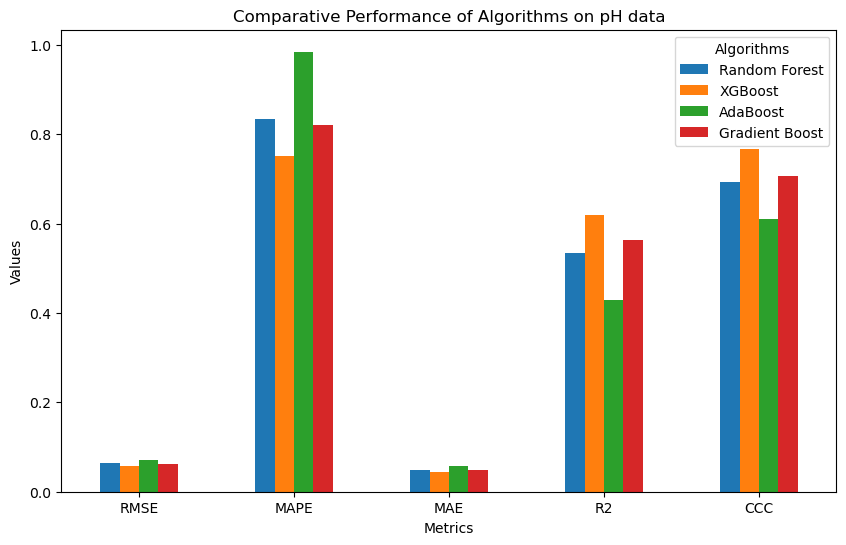

In [59]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on pH data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance.png', dpi=300)

# Display the plot
plt.show()


### CALCUIM DATA

In [60]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_calcium.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_calcium['depth'] = df_calcium['depth'].map(depth_mapping)

# Verify the changes
print(df_calcium['depth'].head())


df_calcium

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,297.9,7019.340162,6714.954450,6578.233470,7003.382536,9862.196562,11177.739137,9487.888925,6684.950484,3466.384186,15413.141864,1.717595e+09,283.919077,69.329987,1015.018100
1,2,-26.1849,28.0876,243.7,7031.460325,6703.814183,6618.614035,6968.203992,9876.528530,11589.644647,9482.440692,6687.696558,3504.409717,15431.697959,1.717544e+09,277.397762,58.336967,1024.027605
2,1,-26.1818,28.0911,329.3,7112.481701,6680.311535,6560.835524,7003.140121,9876.668844,11393.611165,9460.848956,6680.041654,3490.624453,15246.914551,1.718221e+09,284.787338,56.402044,1023.596300
3,2,-26.1818,28.0911,243.7,7100.727418,6713.019963,6546.887582,7004.402396,9854.339992,11465.355119,9468.293779,6711.341332,3471.153378,15424.043766,1.718215e+09,279.352684,71.845107,1028.601556
4,1,-26.1802,28.0875,269.4,7123.407836,6664.057214,6540.348444,6975.621498,9834.639350,11343.528311,9485.945137,6682.956290,3461.159171,15125.248881,1.718939e+09,281.855401,73.915920,1038.680304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2,-26.1851,28.0895,297.9,7099.179825,6629.157498,6611.565877,6940.850843,9873.142854,11311.423149,9490.168296,6706.374280,3457.149097,15414.900101,1.716997e+09,282.924985,63.069425,1014.304025
1148,1,-26.1820,28.0895,297.9,7083.505286,6657.354777,6520.604451,6993.553517,9859.182721,11413.466407,9466.988001,6663.443018,3494.608822,15244.903987,1.717197e+09,280.793213,75.435686,1021.480145
1149,2,-26.1820,28.0895,243.7,7135.645921,6699.410649,6562.654792,6990.957269,9837.536588,11467.993204,9481.225776,6720.761153,3484.182309,15432.591488,1.717564e+09,289.029408,78.242480,1031.814983
1150,1,-26.1839,28.0892,329.3,7067.324715,6717.316256,6548.927422,6970.176142,9849.027058,11376.535202,9484.151995,6692.966694,3484.383443,15347.074007,1.716756e+09,279.612496,71.120543,1007.866208


In [61]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_aluminium is the input data
X = df_calcium.drop(columns=['value'])
y = df_calcium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 18.4419
Average MAE: 13.6006
Average R²: 0.7457
Average MAPE: 4.9704
Average CCC: 0.8544


In [62]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 22:44:37,159] A new study created in memory with name: no-name-08e85e31-3bb8-4af8-b23f-8db39f8ae20c
[I 2024-07-15 22:45:03,573] Trial 0 finished with value: 19.783083577911878 and parameters: {'n_estimators': 226, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 19.783083577911878.
[I 2024-07-15 22:45:31,539] Trial 1 finished with value: 20.151266423977116 and parameters: {'n_estimators': 299, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 19.783083577911878.
[I 2024-07-15 22:45:38,369] Trial 2 finished with value: 21.48331387056652 and parameters: {'n_estimators': 107, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 19.783083577911878.
[I 2024-07-15 22:45:51,027] Trial 3 finished with value: 20.4800126111379 and parameters: {'n_estimators': 169, 'max_depth': 30, 'min_s

[I 2024-07-15 23:04:02,578] Trial 33 finished with value: 18.57225167459428 and parameters: {'n_estimators': 114, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 10 with value: 18.248497858731366.
[I 2024-07-15 23:04:17,459] Trial 34 finished with value: 20.4274071664127 and parameters: {'n_estimators': 173, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 10 with value: 18.248497858731366.
[I 2024-07-15 23:04:45,442] Trial 35 finished with value: 18.321378981635828 and parameters: {'n_estimators': 106, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 10 with value: 18.248497858731366.
[I 2024-07-15 23:05:29,631] Trial 36 finished with value: 18.25983819034436 and parameters: {'n_estimators': 160, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 10 with value: 18.248497858731366.

Best hyperparameters: {'n_estimators': 166, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}
Average RMSE: 18.2364
Average MAE: 13.4835
Average R²: 0.7514
Average MAPE: 4.9372
Average CCC: 0.8579


In [63]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_calcium.drop(columns=['value'])
y = df_calcium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 18.9525
Average MAE: 14.3094
Average R²: 0.7319
Average MAPE: 5.2324
Average CCC: 0.8485


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_calcium.drop(columns=['value'])
y = df_calcium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 20.5698
Average MAE: 15.6263
Average R²: 0.6852
Average MAPE: 5.7842
Average CCC: 0.8100


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [65]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_calcium.drop(columns=['value'])
y = df_calcium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 18.1080
Average MAE: 13.6329
Average R²: 0.7552
Average MAPE: 4.9791
Average CCC: 0.8571


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [66]:
result=pd.read_csv("result_calcium.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,18.1576,18.9806,20.4885,17.8639
MAPE,4.8534,5.2893,5.8018,4.9020
MAE,13.2804,14.3844,15.7087,13.4159
R2,0.7532,0.7307,0.6868,0.7618
CCC,0.8601,0.8482,0.8132,0.8617


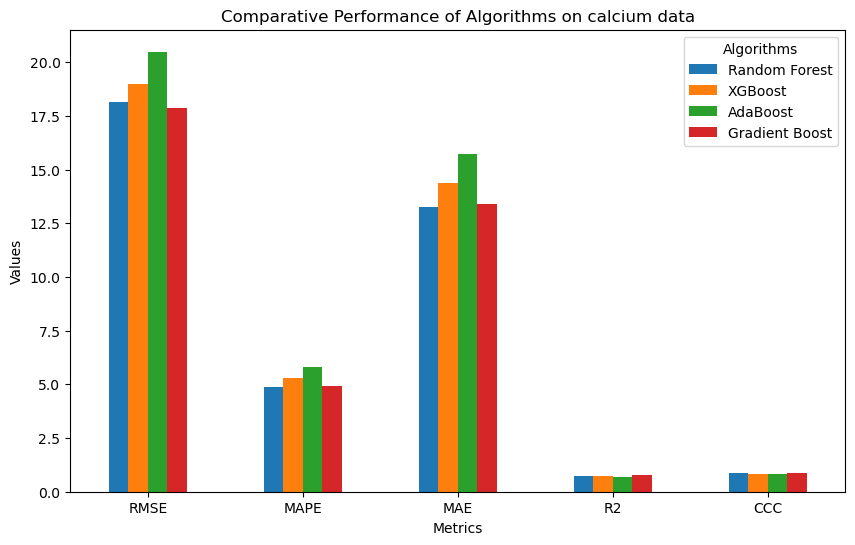

In [67]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on calcium data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_calcium.png', dpi=300)

# Display the plot
plt.show()

### CARBON DATA

In [68]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_carbon.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_carbon['depth'] = df_carbon['depth'].map(depth_mapping)

# Verify the changes
print(df_carbon['depth'].head())


df_carbon

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,21.2,7061.113204,6676.194155,6589.194825,7000.958284,9881.841947,11452.585780,9483.775573,6658.902000,3469.243733,15348.398625,1.717193e+09,281.122026,70.758591,1033.319295
1,2,-26.1849,28.0876,17.2,7006.893297,6688.815966,6568.423126,6969.163894,9907.229625,11240.011871,9454.193558,6657.734951,3492.437387,15402.203056,1.717926e+09,280.652619,76.341593,1013.924883
2,1,-26.1818,28.0911,21.2,7203.035305,6685.158244,6527.192182,6980.644043,9788.527663,11457.266028,9480.691611,6687.827881,3448.334175,15446.704766,1.718137e+09,279.478032,69.292931,1017.097594
3,2,-26.1818,28.0911,17.2,7062.966542,6687.672255,6538.942013,6957.885224,9854.854108,11484.253796,9510.166686,6747.324683,3466.811402,15310.537782,1.717710e+09,280.556762,57.915688,1024.936335
4,1,-26.1802,28.0875,23.5,7098.590843,6678.730483,6540.070721,6961.032303,9861.175811,11595.768971,9468.064966,6676.226928,3471.598500,15399.107541,1.717879e+09,285.314715,79.852606,1020.346837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,1,-26.1839,28.0892,23.5,7108.174680,6692.301932,6516.797197,6986.727116,9809.065273,11418.601939,9475.483901,6715.796181,3477.994314,15535.667437,1.717026e+09,277.965140,73.925984,1016.310843
1151,2,-26.1839,28.0892,19.1,7091.140029,6696.299786,6627.242381,6993.753470,9830.952393,11651.470509,9488.015248,6673.835138,3469.158984,15502.394802,1.717160e+09,281.327021,69.046385,1033.582322
1152,1,-26.1812,28.0897,26.1,7024.018624,6719.417022,6596.506983,6966.522708,9855.777539,11260.835981,9469.291740,6661.724166,3462.186285,15290.655773,1.718155e+09,278.350079,66.426106,1020.881585
1153,2,-26.1812,28.0897,19.1,7165.470060,6670.637730,6600.440917,6979.431550,9893.013222,11385.232422,9488.035143,6690.292730,3473.373669,15360.423334,1.718530e+09,282.798932,70.782033,1015.940505


In [69]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_carbon is the input data
X = df_carbon.drop(columns=['value'])
y = df_carbon['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 1.4379
Average MAE: 1.0960
Average R²: 0.7985
Average MAPE: 5.9476
Average CCC: 0.8879


In [70]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 23:16:47,647] A new study created in memory with name: no-name-44a7a8e4-ead7-4760-b729-1182b5ae2cfb
[I 2024-07-15 23:16:52,603] Trial 0 finished with value: 1.8240245501282004 and parameters: {'n_estimators': 73, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 1.8240245501282004.
[I 2024-07-15 23:17:53,464] Trial 1 finished with value: 1.4346737447063505 and parameters: {'n_estimators': 182, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 1.4346737447063505.
[I 2024-07-15 23:18:05,838] Trial 2 finished with value: 1.476154739065289 and parameters: {'n_estimators': 51, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 1 with value: 1.4346737447063505.
[I 2024-07-15 23:18:31,508] Trial 3 finished with value: 1.6534546880658951 and parameters: {'n_estimators': 214, 'max_depth': 27, 'min_sample

[I 2024-07-15 23:43:05,541] Trial 33 finished with value: 1.433993616763532 and parameters: {'n_estimators': 184, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 15 with value: 1.4338313114960086.
[I 2024-07-15 23:44:06,777] Trial 34 finished with value: 1.433993616763532 and parameters: {'n_estimators': 184, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 15 with value: 1.4338313114960086.
[I 2024-07-15 23:45:06,962] Trial 35 finished with value: 1.434768566019346 and parameters: {'n_estimators': 181, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 15 with value: 1.4338313114960086.
[I 2024-07-15 23:45:48,588] Trial 36 finished with value: 1.4398561080833678 and parameters: {'n_estimators': 136, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 15 with value: 1.4338313114960086.

Best hyperparameters: {'n_estimators': 188, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}
Average RMSE: 1.4338
Average MAE: 1.0969
Average R²: 0.7996
Average MAPE: 5.9528
Average CCC: 0.8883


In [71]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 1.3732
Average MAE: 1.0443
Average R²: 0.8160
Average MAPE: 5.6435
Average CCC: 0.8987


In [ ]:
## GA XGBOOST

In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [ ]:
## ADABOOST

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_carbon.drop(columns=['value'])
y = df_carbon['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 1.7117
Average MAE: 1.3646
Average R²: 0.7156
Average MAPE: 7.3599
Average CCC: 0.8401


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [73]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_aluminium is already defined and preprocessed
X = df_carbon.drop(columns=['value'])
y = df_carbon['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 1.4977
Average MAE: 1.1602
Average R²: 0.7810
Average MAPE: 6.3191
Average CCC: 0.8733


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [74]:
result=pd.read_csv("result_carbon.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.5531,0.5549,0.6726,0.5834
MAPE,4.3506,4.5023,5.2265,4.6003
MAE,0.3939,0.4082,0.4793,0.4202
R2,0.9314,0.9373,0.8985,0.9238
CCC,0.9643,0.9673,0.9469,0.9598


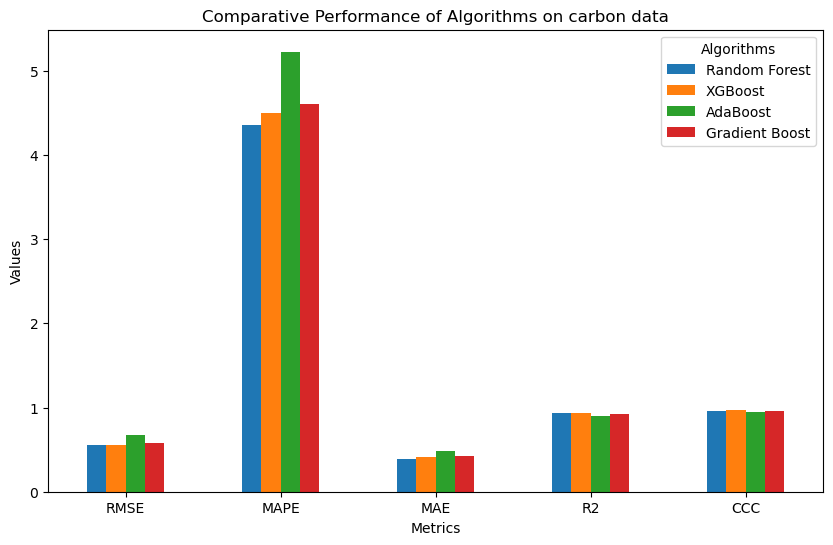

In [75]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on carbon data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_carbon.png', dpi=300)

# Display the plot
plt.show()

###  IRON DATA

In [76]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_iron.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_iron['depth'] = df_iron['depth'].map(depth_mapping)

# Verify the changes
print(df_iron['depth'].head())


df_iron

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,80.5,7079.640554,6746.451595,6565.054812,6969.186182,9854.177971,11531.265095,9482.838917,6684.076179,3476.282504,15446.578742,1.718681e+09,284.791747,64.306320,1028.971334
1,2,-26.1849,28.0876,26.1,7121.685754,6716.335733,6567.558561,6979.054646,9858.220095,11375.360395,9487.497777,6707.351737,3473.575163,15305.318013,1.716880e+09,282.132527,45.259183,1024.497938
2,1,-26.1818,28.0911,80.5,7095.393572,6673.446105,6550.969635,6968.066282,9806.084979,11621.598003,9490.790903,6685.272954,3474.781415,15692.873598,1.717776e+09,280.685334,82.536601,1022.557731
3,2,-26.1818,28.0911,26.1,7098.650651,6696.985456,6561.911155,6986.668583,9740.256782,11448.069017,9498.895088,6604.582223,3438.574979,15328.347721,1.718447e+09,280.736023,81.132511,1025.703522
4,1,-26.1802,28.0875,72.7,7128.423791,6691.396451,6566.005657,7012.191341,9845.964287,11320.061007,9495.089579,6684.084886,3489.982856,15214.590429,1.717644e+09,280.656295,52.307111,1022.748476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,23.5,7104.284626,6755.756066,6619.584630,6967.490876,9818.650569,11459.863903,9486.671295,6688.899602,3465.573147,15410.090378,1.718250e+09,282.252916,72.613864,1025.720962
1150,1,-26.1839,28.0892,72.7,7102.407349,6705.613205,6586.856978,7025.871827,9794.540904,11431.348909,9488.372156,6663.826280,3479.798220,15246.815257,1.717474e+09,279.302103,63.151354,1021.121657
1151,2,-26.1839,28.0892,26.1,7110.924458,6649.161119,6564.145423,7000.849830,9839.913087,11376.963053,9497.230633,6718.161545,3484.888865,15336.511102,1.719017e+09,280.755925,55.360593,1027.634744
1152,1,-26.1812,28.0897,80.5,7077.046201,6693.572033,6605.646662,7011.712714,9762.762822,11497.974389,9495.419435,6714.655693,3485.760689,15241.861696,1.718406e+09,284.156274,78.173968,1031.067246


In [77]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# df_carbon is the input data
X = df_iron.drop(columns=['value'])
y = df_iron['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 3.0666
Average MAE: 2.2936
Average R²: 0.9856
Average MAPE: 4.4736
Average CCC: 0.9927


### GA

In [78]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-15 23:58:38,095] A new study created in memory with name: no-name-77f8adf0-0e4c-4674-90cf-adf8f1d7d648
[I 2024-07-15 23:58:43,381] Trial 0 finished with value: 6.761517058286527 and parameters: {'n_estimators': 66, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 6.761517058286527.
[I 2024-07-15 23:58:57,063] Trial 1 finished with value: 5.0716435933624675 and parameters: {'n_estimators': 151, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 5.0716435933624675.
[I 2024-07-15 23:59:13,960] Trial 2 finished with value: 6.517157609012398 and parameters: {'n_estimators': 204, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: 5.0716435933624675.
[I 2024-07-15 23:59:20,308] Trial 3 finished with value: 5.629418840898586 and parameters: {'n_estimators': 61, 'max_depth': 18, 'min_sam

[I 2024-07-16 00:40:58,220] Trial 33 finished with value: 3.077798345289033 and parameters: {'n_estimators': 251, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 18 with value: 3.073631682589254.
[I 2024-07-16 00:43:55,221] Trial 34 finished with value: 3.0782038773175993 and parameters: {'n_estimators': 215, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 18 with value: 3.073631682589254.
[I 2024-07-16 00:44:26,524] Trial 35 finished with value: 5.37355967046769 and parameters: {'n_estimators': 163, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 18 with value: 3.073631682589254.
[I 2024-07-16 00:47:41,578] Trial 36 finished with value: 3.1044589453134086 and parameters: {'n_estimators': 284, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 18 with value: 3.073631682589254.


Best hyperparameters: {'n_estimators': 259, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None}
Average RMSE: 3.0711
Average MAE: 2.2905
Average R²: 0.9855
Average MAPE: 4.4610
Average CCC: 0.9927


In [79]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 3.2877
Average MAE: 2.4653
Average R²: 0.9834
Average MAPE: 5.0259
Average CCC: 0.9916


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 3.5828
Average MAE: 2.7698
Average R²: 0.9803
Average MAPE: 5.4345
Average CCC: 0.9901


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [81]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 3.2519
Average MAE: 2.5069
Average R²: 0.9838
Average MAPE: 4.9833
Average CCC: 0.9918


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [82]:
result=pd.read_csv("result_iron.csv")

result.set_index('Unnamed: 0', inplace=True)
result


,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,2.9906,3.1075,3.5538,3.1881
MAPE,4.3684,4.7678,5.4656,4.9048
MAE,2.2363,2.3329,2.7739,2.4593
R2,0.9863,0.9852,0.9807,0.9844
CCC,0.9931,0.9925,0.9902,0.9921


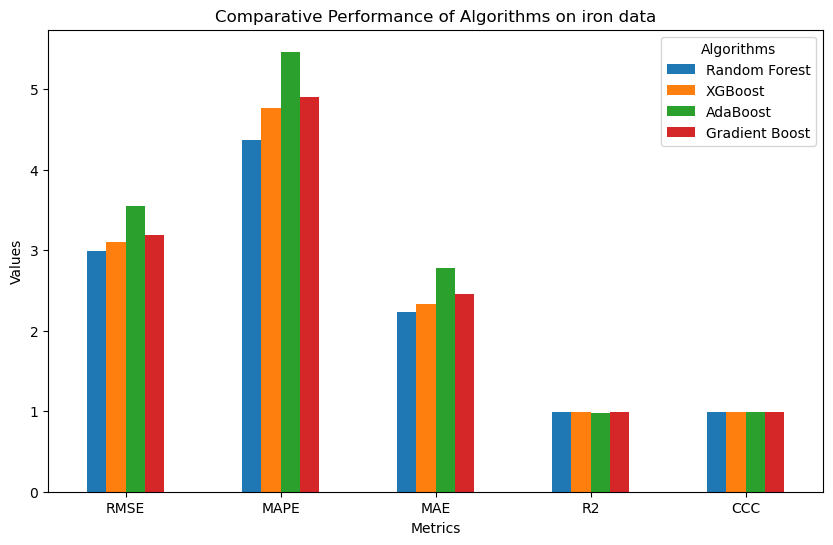

In [83]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on iron data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_iron.png', dpi=300)

# Display the plot
plt.show()


### NITROGEN DATA

In [84]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_nitrogen.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_nitrogen['depth'] = df_nitrogen['depth'].map(depth_mapping)

# Verify the changes
print(df_nitrogen['depth'].head())


df_nitrogen

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,1.1,7167.719830,6660.942417,6568.538446,6993.821110,9782.140850,11433.400325,9451.211783,6667.901444,3468.949106,15178.847635,1.717787e+09,280.878682,80.025689,1033.085055
1,2,-26.1849,28.0876,0.7,7088.185972,6686.229834,6514.304720,6972.132985,9863.026928,11649.579143,9485.020294,6642.599359,3451.540400,15498.968200,1.718030e+09,283.398281,59.945891,1023.753443
2,1,-26.1818,28.0911,1.1,7122.485001,6650.698834,6554.973276,7024.936527,9850.910244,11270.435571,9487.165399,6654.566778,3486.864299,15350.075130,1.717568e+09,282.995332,59.168073,1019.771094
3,2,-26.1818,28.0911,0.7,7058.604203,6684.166586,6557.685984,7001.468493,9805.341295,11369.847808,9495.061242,6692.759222,3500.848476,15334.858465,1.716561e+09,283.928815,67.804263,1023.359684
4,1,-26.1802,28.0875,1.2,7189.332125,6723.780864,6615.620125,7013.328884,9872.337435,11412.098705,9482.772663,6681.055734,3475.779021,15330.740159,1.718561e+09,282.127641,53.115571,1019.671693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1,-26.1839,28.0892,1.2,7033.793633,6666.015147,6603.263146,6978.910397,9877.866790,11566.786456,9496.156430,6696.738189,3458.261023,15189.404240,1.718146e+09,280.942288,62.650475,1027.766655
1152,2,-26.1839,28.0892,0.7,7146.985556,6681.789306,6588.421927,7031.806399,9826.610457,11308.824778,9480.864911,6720.493865,3486.489531,15289.430432,1.718246e+09,286.496753,59.024455,1028.078336
1153,1,-26.1812,28.0897,1.1,7025.570907,6725.311676,6598.027305,6994.131983,9818.681426,11494.880360,9484.166036,6672.984248,3471.624345,15372.148520,1.716128e+09,279.878962,61.917505,1016.041031
1154,2,-26.1812,28.0897,0.7,7047.750736,6674.760828,6582.721433,6984.736025,9826.413214,11392.585277,9488.818888,6669.674820,3451.354996,15350.236979,1.718497e+09,283.988936,60.067525,1020.627697


In [85]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_carbon is the input data
X = df_nitrogen.drop(columns=['value'])
y = df_nitrogen['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0559
Average MAE: 0.0416
Average R²: 0.9200
Average MAPE: 4.7519
Average CCC: 0.9583


### GA

In [86]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-16 03:19:59,745] A new study created in memory with name: no-name-b81d4cd0-ded4-45ac-927b-a6eb4c5d766b
[I 2024-07-16 03:20:25,122] Trial 0 finished with value: 0.06694862104606578 and parameters: {'n_estimators': 181, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.06694862104606578.
[I 2024-07-16 03:21:25,824] Trial 1 finished with value: 0.055968653025015504 and parameters: {'n_estimators': 162, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 1 with value: 0.055968653025015504.
[I 2024-07-16 03:22:12,236] Trial 2 finished with value: 0.05674318483311889 and parameters: {'n_estimators': 162, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: 0.055968653025015504.
[I 2024-07-16 03:22:59,452] Trial 3 finished with value: 0.05576184881756907 and parameters: {'n_estimators': 86, 'max_depth': 28

[I 2024-07-16 03:55:06,663] Trial 32 finished with value: 0.05548513418558163 and parameters: {'n_estimators': 300, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 21 with value: 0.05535839874678037.
[I 2024-07-16 03:56:53,349] Trial 33 finished with value: 0.05539160435374259 and parameters: {'n_estimators': 238, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 21 with value: 0.05535839874678037.
[I 2024-07-16 03:58:57,114] Trial 34 finished with value: 0.055485076124208235 and parameters: {'n_estimators': 246, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 21 with value: 0.05535839874678037.
[I 2024-07-16 04:00:35,537] Trial 35 finished with value: 0.05583845174053407 and parameters: {'n_estimators': 270, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 21 with value: 0.0553583

Best hyperparameters: {'n_estimators': 298, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}
Average RMSE: 0.0554
Average MAE: 0.0409
Average R²: 0.9215
Average MAPE: 4.6581
Average CCC: 0.9591


In [87]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0559
Average MAE: 0.0425
Average R²: 0.9197
Average MAPE: 4.9055
Average CCC: 0.9583


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.0595
Average MAE: 0.0444
Average R²: 0.9091
Average MAPE: 5.0006
Average CCC: 0.9525


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [89]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.0557
Average MAE: 0.0428
Average R²: 0.9207
Average MAPE: 4.8746
Average CCC: 0.9583


In [ ]:
# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Objective function for PSO
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from PSO
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
lb = [0.01, 50, 1]  # lower bounds for learning_rate, n_estimators, max_depth
ub = [1.0, 500, 10]  # upper bounds for learning_rate, n_estimators, max_depth

# Perform PSO
best_params, best_score = pso(objective, lb, ub, swarmsize=20, maxiter=100)

# Extract the best hyperparameters
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [90]:
result=pd.read_csv("result_nitrogen.csv")

result.set_index('Unnamed: 0', inplace=True)
result



,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.0549,0.0536,0.0598,0.0551
MAPE,4.6061,4.6632,4.9690,4.7973
MAE,0.0404,0.0404,0.0442,0.0422
R2,0.9229,0.9263,0.9084,0.9224
CCC,0.9599,0.9617,0.9523,0.9592


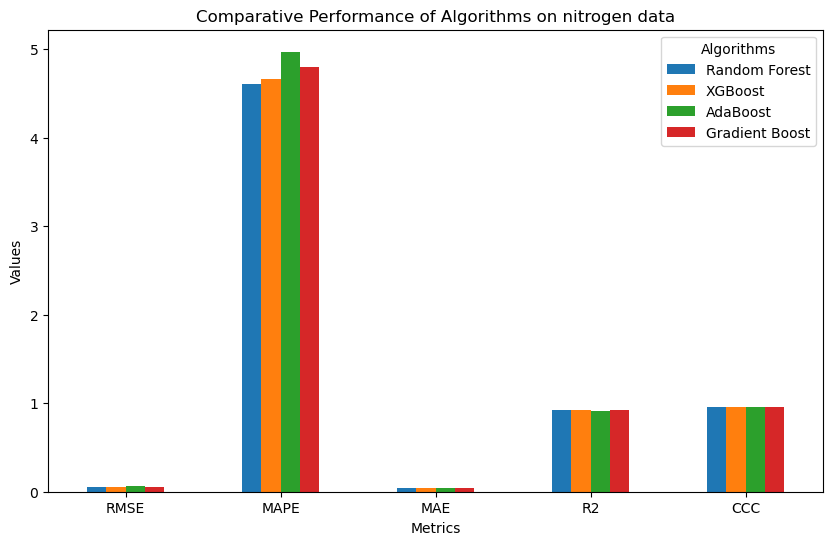

In [91]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on nitrogen data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_nitrogen.png', dpi=300)

# Display the plot
plt.show()


### PHOSPHORUC DATA

In [92]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_phosphorus.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_phosphorus['depth'] = df_phosphorus['depth'].map(depth_mapping)

# Verify the changes
print(df_phosphorus['depth'].head())


df_phosphorus

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,7.2,7206.329322,6677.051705,6558.035161,7000.008320,9828.687917,11504.721659,9483.228540,6667.647020,3484.904505,15298.011677,1.718345e+09,280.891205,56.868738,1029.181780
1,2,-26.1849,28.0876,6.4,7151.276682,6661.885977,6619.289217,6983.365466,9791.560859,11503.602057,9489.235963,6674.010851,3451.022067,15415.686162,1.717460e+09,276.580131,61.215920,1027.208677
2,1,-26.1818,28.0911,7.2,7136.463020,6688.366315,6559.679152,7007.839023,9875.535056,11391.032786,9476.245309,6718.747179,3475.594867,15333.945405,1.717586e+09,278.873948,67.338626,1034.349827
3,2,-26.1818,28.0911,6.4,7113.110568,6678.188657,6581.703894,6953.538822,9859.080843,11468.689401,9465.642949,6721.504032,3446.332840,15268.976801,1.717041e+09,281.559662,70.813125,1036.156121
4,1,-26.1802,28.0875,7.2,7103.919733,6724.518507,6597.260656,6961.090034,9780.336163,11450.565225,9480.096173,6671.207783,3467.193587,15146.974568,1.718392e+09,282.544130,65.116604,1034.896009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,5.7,7065.822990,6703.257732,6579.079886,6967.745423,9817.918036,11469.994665,9486.690420,6660.433405,3497.086700,15336.326685,1.717338e+09,279.084514,70.409202,1028.275063
1150,1,-26.1839,28.0892,7.2,7041.929240,6682.630958,6610.016396,7016.990206,9856.668320,11518.577618,9475.450981,6644.034224,3463.965064,15368.066667,1.718635e+09,284.844969,57.159678,1012.179982
1151,2,-26.1839,28.0892,6.4,7025.174163,6710.968367,6628.413244,6989.800915,9863.914558,11501.159464,9499.765659,6698.052032,3464.405863,15415.047008,1.717566e+09,286.039211,68.040737,1021.400516
1152,1,-26.1812,28.0897,8.0,7106.589182,6677.060976,6565.266241,7073.199146,9790.651314,11145.089096,9479.911957,6624.396196,3477.605031,15242.324280,1.718597e+09,285.756807,77.168145,1034.936832


In [93]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

X = df_phosphorus.drop(columns=['value'])
y = df_phosphorus['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.6786
Average MAE: 0.5311
Average R²: 0.3255
Average MAPE: 7.8415
Average CCC: 0.4628


## GA

In [94]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-16 04:19:01,616] A new study created in memory with name: no-name-cfe7375a-c806-4154-991a-d3773fbc5464
[I 2024-07-16 04:19:32,691] Trial 0 finished with value: 0.7205784456500088 and parameters: {'n_estimators': 234, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7205784456500088.
[I 2024-07-16 04:20:36,602] Trial 1 finished with value: 0.690404039915908 and parameters: {'n_estimators': 271, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 1 with value: 0.690404039915908.
[I 2024-07-16 04:20:45,600] Trial 2 finished with value: 0.727735276575188 and parameters: {'n_estimators': 81, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.690404039915908.
[I 2024-07-16 04:20:58,973] Trial 3 finished with value: 0.7225404382523235 and parameters: {'n_estimators': 100, 'max_depth': 21, 'min_sam

[I 2024-07-16 04:47:43,918] Trial 33 finished with value: 0.6772571344961396 and parameters: {'n_estimators': 187, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 17 with value: 0.6769360487305496.
[I 2024-07-16 04:48:07,214] Trial 34 finished with value: 0.6846057300915941 and parameters: {'n_estimators': 58, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 17 with value: 0.6769360487305496.
[I 2024-07-16 04:48:57,381] Trial 35 finished with value: 0.6789861533031898 and parameters: {'n_estimators': 140, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 17 with value: 0.6769360487305496.
[I 2024-07-16 04:49:30,112] Trial 36 finished with value: 0.726510568361084 and parameters: {'n_estimators': 284, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 17 with value: 0.67693604873054

Best hyperparameters: {'n_estimators': 263, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}
Average RMSE: 0.6769
Average MAE: 0.5308
Average R²: 0.3291
Average MAPE: 7.8434
Average CCC: 0.4593


In [95]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.6376
Average MAE: 0.5049
Average R²: 0.4057
Average MAPE: 7.4647
Average CCC: 0.5806


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.7113
Average MAE: 0.5758
Average R²: 0.2606
Average MAPE: 8.5848
Average CCC: 0.4131


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [97]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.6723
Average MAE: 0.5364
Average R²: 0.3386
Average MAPE: 7.9661
Average CCC: 0.4737


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [98]:
result=pd.read_csv("result_phosphorus.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.6590,0.6193,0.7168,0.6634
MAPE,7.5893,7.1131,8.6864,7.8160
MAE,0.5139,0.4809,0.5832,0.5265
R2,0.3639,0.4382,0.2478,0.3560
CCC,0.5027,0.6136,0.3975,0.4914


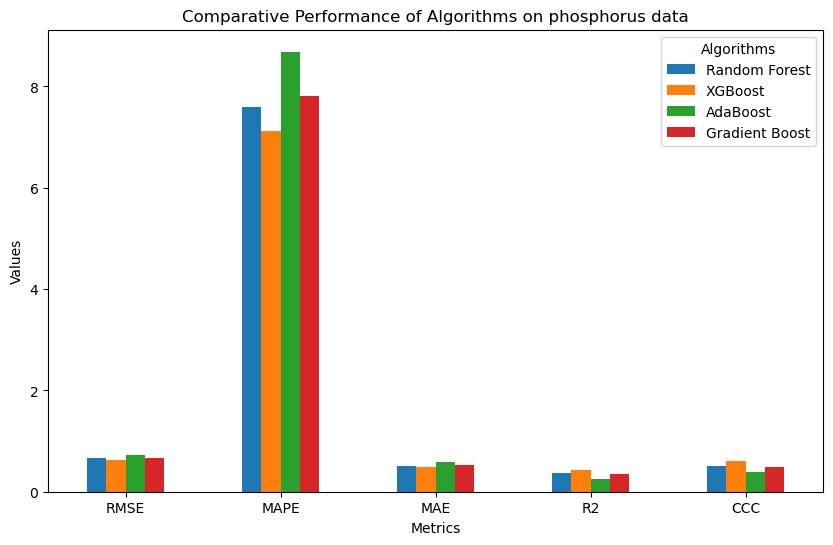

In [99]:


index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on phosphorus data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_phosphorus.png', dpi=300)

# Display the plot
plt.show()


###  POTASSIUM_DATA

In [100]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_potassium.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_potassium['depth'] = df_potassium['depth'].map(depth_mapping)

# Verify the changes
print(df_potassium['depth'].head())


df_potassium

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,98.5,7142.531626,6625.437983,6525.905586,6952.362529,9862.456835,11371.515960,9463.436380,6723.002797,3471.927053,15290.531717,1.717173e+09,283.701027,61.412249,1029.516035
1,2,-26.1849,28.0876,89.0,6994.621783,6684.964991,6549.494126,7053.440875,9920.300626,11406.849092,9479.329548,6696.728234,3477.841928,15280.818808,1.717559e+09,281.032229,57.535921,1019.454881
2,1,-26.1818,28.0911,89.0,7174.524266,6684.816500,6607.249380,6989.461317,9788.421673,11219.784096,9492.272077,6697.328243,3494.455552,15415.451095,1.718424e+09,278.736694,69.866709,1025.526621
3,2,-26.1818,28.0911,72.7,7039.177953,6649.725782,6574.127251,7046.688551,9861.776142,11548.106434,9490.892207,6688.326118,3466.253984,15191.247273,1.717197e+09,281.106420,61.501639,1022.103824
4,1,-26.1802,28.0875,89.0,7102.179307,6717.509796,6576.546943,6968.732414,9806.847622,11384.344141,9500.187970,6638.773478,3497.403727,15458.346040,1.718175e+09,282.463148,52.239106,1016.542025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2,-26.1851,28.0895,65.7,7103.215418,6671.585143,6579.002489,6966.567098,9785.571176,11486.797255,9493.630197,6682.196728,3466.845216,15503.613210,1.717962e+09,279.540420,59.515411,1020.714245
1148,1,-26.1820,28.0895,80.5,7064.693347,6716.096925,6622.874206,7038.749490,9888.107703,11380.572301,9488.394041,6710.947826,3466.496652,15407.690576,1.717530e+09,281.684510,87.368229,1016.307978
1149,2,-26.1820,28.0895,72.7,7085.483917,6680.330036,6567.089646,6989.963859,9802.218655,11507.818366,9469.903086,6728.103261,3478.068906,15361.941197,1.717125e+09,284.785595,63.021569,1027.869215
1150,1,-26.1839,28.0892,98.5,7132.948593,6701.603072,6574.977931,6929.368704,9767.773560,11521.875304,9505.755340,6707.355358,3476.941031,15382.234888,1.718288e+09,279.534570,51.374173,1025.507877


In [101]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_carbon is the input data
X = df_potassium.drop(columns=['value'])
y = df_potassium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 6.1862
Average MAE: 4.8209
Average R²: 0.6062
Average MAPE: 5.9749
Average CCC: 0.7505


## GA

In [102]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-16 05:05:30,768] A new study created in memory with name: no-name-90231cda-0ba9-4ddc-8a18-3d157cb8cadd
[I 2024-07-16 05:06:27,422] Trial 0 finished with value: 6.257565731378266 and parameters: {'n_estimators': 237, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 6.257565731378266.
[I 2024-07-16 05:06:35,655] Trial 1 finished with value: 6.87789110147102 and parameters: {'n_estimators': 77, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 6.257565731378266.
[I 2024-07-16 05:06:47,624] Trial 2 finished with value: 6.8773865611413765 and parameters: {'n_estimators': 110, 'max_depth': 29, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 6.257565731378266.
[I 2024-07-16 05:08:24,238] Trial 3 finished with value: 6.144196627118899 and parameters: {'n_estimators': 295, 'max_depth': 17, 'min_samples_

[I 2024-07-16 05:45:55,959] Trial 33 finished with value: 6.1274448155945915 and parameters: {'n_estimators': 278, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 31 with value: 6.125881628596587.
[I 2024-07-16 05:48:01,179] Trial 34 finished with value: 6.155141650999676 and parameters: {'n_estimators': 229, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 31 with value: 6.125881628596587.
[I 2024-07-16 05:50:17,292] Trial 35 finished with value: 6.138623344190115 and parameters: {'n_estimators': 250, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 31 with value: 6.125881628596587.
[I 2024-07-16 05:52:55,089] Trial 36 finished with value: 6.125944146838193 and parameters: {'n_estimators': 287, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 31 with value: 6.125881628596587.
[I 

Best hyperparameters: {'n_estimators': 289, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None}
Average RMSE: 6.1212
Average MAE: 4.7572
Average R²: 0.6149
Average MAPE: 5.8956
Average CCC: 0.7550


In [103]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 5.8126
Average MAE: 4.5193
Average R²: 0.6480
Average MAPE: 5.6115
Average CCC: 0.7916


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 6.9290
Average MAE: 5.5099
Average R²: 0.5070
Average MAPE: 6.9523
Average CCC: 0.6832


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [105]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 6.1871
Average MAE: 4.9018
Average R²: 0.6057
Average MAPE: 6.0716
Average CCC: 0.7469


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [106]:
result=pd.read_csv("result_potassium.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,5.9795,5.8196,6.9398,6.0271
MAPE,5.7792,5.5438,6.9027,5.9164
MAE,4.6635,4.4569,5.4808,4.7748
R2,0.6320,0.6474,0.5059,0.6261
CCC,0.7695,0.7934,0.6848,0.7617


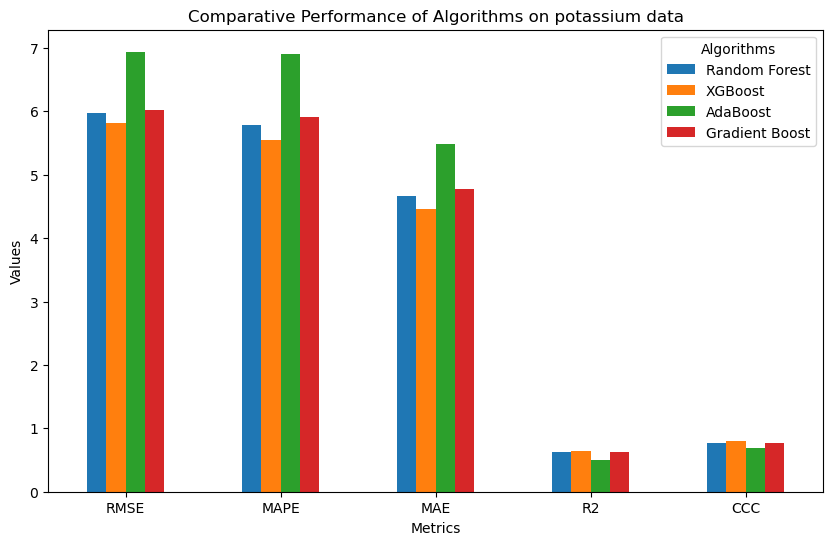

In [107]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on potassium data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_potassium.png', dpi=300)

# Display the plot
plt.show()


### MAGNESIUM DATA

In [108]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_magnesium.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_magnesium['depth'] = df_magnesium['depth'].map(depth_mapping)

# Verify the changes
print(df_magnesium['depth'].head())


df_magnesium

0    1
1    2
2    1
3    2
4    1
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,1,-26.1849,28.0876,147.4,7119.821602,6680.493964,6620.992370,6989.534204,9772.953439,11501.375742,9505.361639,6726.205146,3480.439998,15380.164081,1.718367e+09,283.446549,72.588218,1019.391142
1,2,-26.1849,28.0876,147.4,7018.649455,6652.846710,6552.937459,6959.517143,9815.180545,11306.934367,9476.389336,6704.542951,3478.243090,15301.712209,1.718074e+09,280.184376,56.231931,1025.269334
2,1,-26.1818,28.0911,120.5,7192.492015,6676.174984,6591.078853,6914.520890,9859.252701,11485.546052,9486.404859,6659.011435,3491.864731,15383.521707,1.717992e+09,275.540324,57.316046,1024.896442
3,2,-26.1818,28.0911,120.5,7003.092454,6708.116928,6584.737148,7026.444860,9915.977948,11491.109118,9482.755934,6705.274251,3485.371885,15246.295258,1.717167e+09,277.974852,63.647876,1023.333351
4,1,-26.1802,28.0875,108.9,7072.178947,6684.614335,6528.943648,7013.113664,9819.075111,11342.134985,9486.668618,6711.021843,3500.723012,15313.724441,1.717691e+09,280.419668,55.921074,1023.812470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2,-26.1820,28.0895,133.3,7067.695897,6689.723563,6577.149941,6952.406985,9793.207746,11523.568804,9484.609163,6721.773279,3473.787251,15243.787651,1.717782e+09,281.709902,81.661187,1023.550372
1150,1,-26.1839,28.0892,133.3,7022.850410,6681.545190,6543.984762,6985.047612,9907.363678,11430.657343,9490.762604,6711.350793,3482.488042,15279.153682,1.717496e+09,281.910207,54.883102,1017.791364
1151,2,-26.1839,28.0892,133.3,7126.473084,6755.208526,6566.918808,6994.849368,9905.974922,11347.321553,9512.814694,6739.624838,3497.065397,15421.737285,1.717904e+09,279.651121,63.759287,1025.174923
1152,1,-26.1812,28.0897,133.3,7070.188480,6686.822969,6624.817194,6992.966817,9842.276034,11367.382506,9481.555960,6699.146223,3456.503821,15399.382926,1.718536e+09,277.436499,49.939603,1027.545178


In [109]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_carbon is the input data
X = df_magnesium.drop(columns=['value'])
y = df_magnesium['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 7.6971
Average MAE: 6.1355
Average R²: 0.5730
Average MAPE: 4.6804
Average CCC: 0.7057


## GA

In [110]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-16 06:20:23,392] A new study created in memory with name: no-name-5e3cd7f8-a183-4277-845c-b9bdfd818a4e
[I 2024-07-16 06:20:59,185] Trial 0 finished with value: 8.240584672103052 and parameters: {'n_estimators': 146, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 8.240584672103052.
[I 2024-07-16 06:22:08,491] Trial 1 finished with value: 8.035939201418905 and parameters: {'n_estimators': 263, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 8.035939201418905.
[I 2024-07-16 06:22:32,712] Trial 2 finished with value: 9.990320545269032 and parameters: {'n_estimators': 245, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 8.035939201418905.
[I 2024-07-16 06:23:22,084] Trial 3 finished with value: 7.889013993343722 and parameters: {'n_estimators': 162, 'max_depth': 10, 'min_samples_

[I 2024-07-16 06:43:05,239] Trial 33 finished with value: 7.649816437800011 and parameters: {'n_estimators': 125, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 33 with value: 7.649816437800011.
[I 2024-07-16 06:44:25,501] Trial 34 finished with value: 7.667427990036886 and parameters: {'n_estimators': 147, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 33 with value: 7.649816437800011.
[I 2024-07-16 06:45:30,111] Trial 35 finished with value: 7.785442823075941 and parameters: {'n_estimators': 135, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 33 with value: 7.649816437800011.
[I 2024-07-16 06:46:17,934] Trial 36 finished with value: 7.728068969009546 and parameters: {'n_estimators': 95, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 33 with value: 7.649816437800011.
[I 20

Best hyperparameters: {'n_estimators': 129, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}
Average RMSE: 7.6460
Average MAE: 6.1270
Average R²: 0.5787
Average MAPE: 4.6745
Average CCC: 0.7092


In [111]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 7.7605
Average MAE: 6.1876
Average R²: 0.5646
Average MAPE: 4.7275
Average CCC: 0.7098


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 9.6564
Average MAE: 7.8441
Average R²: 0.3264
Average MAPE: 6.0390
Average CCC: 0.4534


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [113]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 8.7437
Average MAE: 7.0789
Average R²: 0.4491
Average MAPE: 5.4146
Average CCC: 0.5922


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [114]:
result=pd.read_csv("result_magnesium.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,7.4461,7.4979,9.5249,8.6147
MAPE,4.5098,4.4857,5.9936,5.3350
MAE,5.9103,5.8810,7.7703,6.9749
R2,0.5996,0.5951,0.3466,0.4639
CCC,0.7298,0.7386,0.4789,0.6056


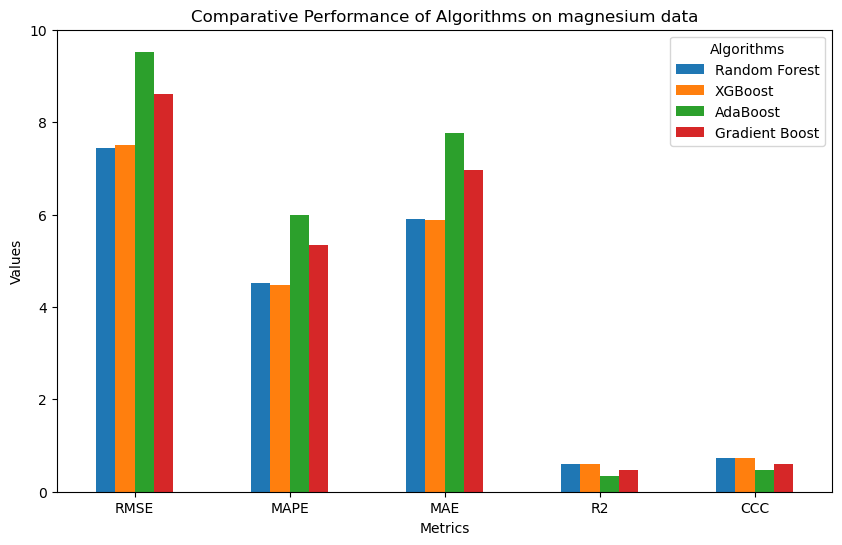

In [115]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on magnesium data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_magnesium.png', dpi=300)

# Display the plot
plt.show()


### SOIL EXCHANGE CAPACITY DATA.

In [116]:
columns_to_remove = ['id', 'updated_at', 'created_at', 'property_id','date_collected']
df_exchange_capacity.drop(columns=columns_to_remove, inplace=True)


# Define a mapping from the categories to numerical values
depth_mapping = {
    '0-20': 1,
    '20-50': 2
}

# Apply the mapping to the 'depth' column
df_exchange_capacity['depth'] = df_exchange_capacity['depth'].map(depth_mapping)

# Verify the changes
print(df_exchange_capacity['depth'].head())


df_exchange_capacity

0    2
1    1
2    2
3    1
4    2
Name: depth, dtype: int64


,depth,latitude,longitude,value,Costal aerosol,Blue_band,Green_band,Read Band,NIVR,IR1,IR2,NIVR_1,Water Vapour,SW12,sunset,temperature,humidity,pressure
0,2,-26.1849,28.0876,6.4,7122.038535,6683.292714,6592.412771,7021.449850,9802.593508,11487.541673,9494.184422,6684.628050,3503.385142,15213.004704,1.718749e+09,279.125760,66.000021,1025.070598
1,1,-26.1818,28.0911,6.4,7122.734959,6677.273121,6551.222507,6995.960711,9859.404834,11431.843445,9482.935429,6656.372118,3512.213104,15488.087773,1.717829e+09,280.801192,77.007542,1025.858632
2,2,-26.1818,28.0911,6.4,7092.191178,6705.175973,6581.355793,6960.636602,9812.441812,11365.136386,9490.421235,6717.625494,3469.491205,15198.589404,1.717655e+09,279.516530,70.784428,1024.797693
3,1,-26.1802,28.0875,9.0,7043.094200,6697.543244,6617.903893,7008.208676,9905.894904,11349.089172,9474.183557,6653.657804,3454.961958,15377.544177,1.717419e+09,278.318802,68.407510,1027.777106
4,2,-26.1802,28.0875,9.0,7046.351614,6716.141689,6519.506027,7034.561841,9867.137317,11493.253606,9483.001004,6720.661054,3466.796030,15323.943574,1.717951e+09,282.573331,71.925020,1023.411076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2,-26.1820,28.0895,7.2,7106.839644,6675.749089,6568.785686,7049.809210,9826.618235,11509.137447,9464.408121,6686.656416,3487.769644,15260.639214,1.717692e+09,277.665598,53.594672,1020.853137
1151,1,-26.1839,28.0892,7.2,7060.836802,6744.753182,6581.499940,6965.047964,9864.328137,11318.941785,9471.007198,6674.885020,3496.729586,15456.669543,1.717500e+09,282.010669,79.472586,1018.752856
1152,2,-26.1839,28.0892,7.2,7113.626144,6703.052425,6564.588178,6963.509753,9804.843229,11512.537674,9491.390816,6662.019004,3459.698053,15147.704033,1.718035e+09,285.028743,70.004651,1025.292416
1153,1,-26.1812,28.0897,7.2,7062.366000,6688.222816,6530.827592,6978.524278,9828.455958,11425.507335,9461.339201,6725.523343,3476.717373,15431.852255,1.717152e+09,276.710715,60.146653,1023.589017


In [117]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# df_carbon is the input data
X = df_exchange_capacity.drop(columns=['value'])
y = df_exchange_capacity['value']

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.4306
Average MAE: 0.3587
Average R²: 0.5534
Average MAPE: 5.6189
Average CCC: 0.7026


In [118]:
# Define the objective function for GA
def objective(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Initialize list to store the metrics for each fold
    rmse_scores = []
    
    # Perform K-Fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Random Forest model
        model = RandomForestRegressor(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth) if max_depth > 0 else None,
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
    
    # Return the average RMSE across all folds
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[50, 100],   # n_estimators
                     [1, 30],     # max_depth
                     [2, 10],     # min_samples_split
                     [1, 10]])    # min_samples_leaf

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=4, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_n_estimators, best_max_depth, best_min_samples_split, best_min_samples_leaf = best_params

# Initialize the K-Fold cross-validation for final evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Perform K-Fold cross-validation with the best hyperparameters
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Random Forest model with the best hyperparameters
    model = RandomForestRegressor(
        n_estimators=int(best_n_estimators),
        max_depth=int(best_max_depth) if best_max_depth > 0 else None,
        min_samples_split=int(best_min_samples_split),
        min_samples_leaf=int(best_min_samples_leaf),
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: n_estimators={int(best_n_estimators)}, max_depth={int(best_max_depth)}, min_samples_split={int(best_min_samples_split)}, min_samples_leaf={int(best_min_samples_leaf)}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


[I 2024-07-16 07:02:52,956] A new study created in memory with name: no-name-aae7c307-a95d-4e60-a724-13b3d6165e80
[I 2024-07-16 07:03:10,319] Trial 0 finished with value: 0.5116915066307317 and parameters: {'n_estimators': 121, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5116915066307317.
[I 2024-07-16 07:03:52,652] Trial 1 finished with value: 0.4349347920404 and parameters: {'n_estimators': 107, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 1 with value: 0.4349347920404.
[I 2024-07-16 07:05:53,390] Trial 2 finished with value: 0.43762472708101197 and parameters: {'n_estimators': 291, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 1 with value: 0.4349347920404.
[I 2024-07-16 07:06:37,153] Trial 3 finished with value: 0.5106926844223059 and parameters: {'n_estimators': 287, 'max_depth': 13, 'min_samples_sp

[I 2024-07-16 07:54:21,154] Trial 33 finished with value: 0.4272545110387866 and parameters: {'n_estimators': 279, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 33 with value: 0.4272545110387866.
[I 2024-07-16 07:56:55,544] Trial 34 finished with value: 0.42835577289002214 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 33 with value: 0.4272545110387866.
[I 2024-07-16 07:59:21,824] Trial 35 finished with value: 0.4272288135968519 and parameters: {'n_estimators': 282, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 35 with value: 0.4272288135968519.
[I 2024-07-16 08:01:22,419] Trial 36 finished with value: 0.4347162873186413 and parameters: {'n_estimators': 281, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 35 with value: 0.4272288135968

Best hyperparameters: {'n_estimators': 282, 'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': None}
Average RMSE: 0.4272
Average MAE: 0.3568
Average R²: 0.5606
Average MAPE: 5.5920
Average CCC: 0.7065


In [119]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the XGBoost model
    model = XGBRegressor(random_state=43)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.4318
Average MAE: 0.3497
Average R²: 0.5488
Average MAPE: 5.4848
Average CCC: 0.7119


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the XGBoost model with hyperparameters from GA
        model = XGBRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the XGBoost model with the best hyperparameters
    model = XGBRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the AdaBoost model
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')

Average RMSE: 0.5205
Average MAE: 0.4218
Average R²: 0.3474
Average MAPE: 6.6607
Average CCC: 0.5017


In [ ]:

# Objective function for GA
def objective(params):
    learning_rate, n_estimators = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the AdaBoost model with hyperparameters from GA
        model = AdaBoostRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100]])    # n_estimators

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=2, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the AdaBoost model with the best hyperparameters
    model = AdaBoostRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [121]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

# Custom function to calculate Concordance Correlation Coefficient (CCC)
def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    covariance = np.mean((y_true - mean_true) * (y_pred - mean_pred))
    ccc = (2 * covariance) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the Gradient Boosting model
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)
    
    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


Average RMSE: 0.4804
Average MAE: 0.4029
Average R²: 0.4423
Average MAPE: 6.3026
Average CCC: 0.6047


In [ ]:
# Objective function for GA
def objective(params):
    learning_rate, n_estimators, max_depth = params

    # Initialize the K-Fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize and train the Gradient Boosting model with hyperparameters from GA
        model = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    # Return the average RMSE
    return np.mean(rmse_scores)

# Define the bounds for the hyperparameters
varbound = np.array([[0.01, 1.0],   # learning_rate
                     [50, 100],     # n_estimators
                     [1, 10]])      # max_depth

# Set the algorithm parameters
algorithm_param = {'max_num_iteration': 20,
                   'population_size': 10,
                   'mutation_probability': 0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

# Initialize and run the Genetic Algorithm
model = ga(function=objective, dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

# Extract the best hyperparameters
best_params = model.output_dict['variable']
best_learning_rate = best_params[0]
best_n_estimators = int(best_params[1])
best_max_depth = int(best_params[2])

# Initialize the K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
ccc_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(learning_rate=best_learning_rate, n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    ccc = concordance_correlation_coefficient(y_test, y_pred)

    # Append metrics to the respective lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    ccc_scores.append(ccc)

# Print the average metrics
print(f'Best hyperparameters: learning_rate={best_learning_rate}, n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'Average RMSE: {np.mean(rmse_scores):.4f}')
print(f'Average MAE: {np.mean(mae_scores):.4f}')
print(f'Average R²: {np.mean(r2_scores):.4f}')
print(f'Average MAPE: {np.mean(mape_scores):.4f}')
print(f'Average CCC: {np.mean(ccc_scores):.4f}')


In [122]:
result=pd.read_csv("result_exchange_capacity.csv")

result.set_index('Unnamed: 0', inplace=True)
result

,Random Forest,XGBoost,AdaBoost,Gradient Boost
Unnamed: 0,,,,
RMSE,0.4188,0.4125,0.5140,0.4718
MAPE,5.4340,5.2331,6.5865,6.1887
MAE,0.3468,0.3343,0.4170,0.3955
R2,0.5781,0.5894,0.3633,0.4635
CCC,0.7229,0.7434,0.5133,0.6239


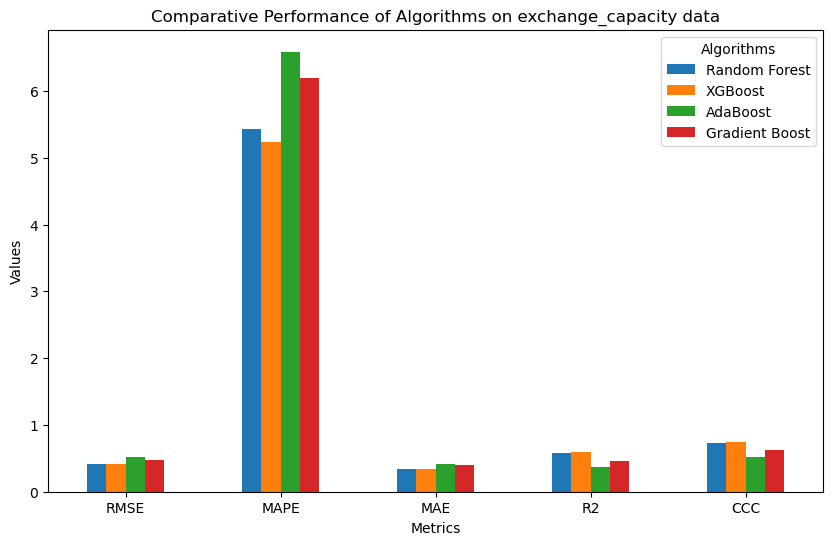

In [123]:
index = ['RMSE', 'MAPE', 'MAE', 'R2', 'CCC']

# Plotting the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Comparative Performance of Algorithms on exchange_capacity data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='Algorithms')
plt.savefig('comparative_performance_exchange_capacity.png', dpi=300)

# Display the plot
plt.show()
